### Genre Classification:

#### Objective: Classify tracks by genre.

In [1]:
! pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("C:\\Users\\Dell\\OneDrive - Havells\\Desktop\\Classify-Spotify-Track-Genre\\Experiments\\dataset.csv")
dataset.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [3]:
df=pd.DataFrame(dataset)
df.sample()

Unnamed: 0                track_id                  artists album_name  \
43430       43430  6RksBSj5fFtPkUnL2EE0oe  Five Finger Death Punch         F8   

                track_name  popularity  duration_ms  explicit  danceability  \
43430  Darkness Settles In          62       281803      True         0.334   

       energy  ...  loudness  mode  speechiness  acousticness  \
43430   0.933  ...     -4.49     1         0.09       0.00732   

       instrumentalness  liveness  valence    tempo  time_signature  \
43430               0.0     0.264     0.18  132.812               4   

       track_genre  
43430       groove  

[1 rows x 21 columns]

In [6]:
pd.set_option("display.max_columns",None)

In [7]:
df.sample()

Unnamed: 0                track_id                             artists  \
15014       15014  3AvQO9AjUzXv8Lhe92uV6b  untrusted;creamy;11:11 Music Group   

                                     album_name  \
15014  woo x I was never there (tiktok version)   

                                     track_name  popularity  duration_ms  \
15014  woo x I was never there (tiktok version)          60       212142   

       explicit  danceability  energy  key  loudness  mode  speechiness  \
15014     False         0.603    0.58    9     -10.2     0       0.0352   

       acousticness  instrumentalness  liveness  valence   tempo  \
15014         0.384           0.00236    0.0897    0.282  112.05   

       time_signature track_genre  
15014               4       chill

In [8]:
df.shape

(114000, 21)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [29]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [33]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [14]:
object_columns=df.select_dtypes("object").columns
object_columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], dtype='object')

In [15]:
col_int=df.select_dtypes("int64").columns
col_int

Index(['Unnamed: 0', 'popularity', 'duration_ms', 'key', 'mode',
       'time_signature'],
      dtype='object')

In [16]:
col_float=df.select_dtypes("float64").columns
col_float

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [17]:
df.describe(exclude="object")

Unnamed: 0     popularity   duration_ms explicit   danceability  \
count   113999.000000  113999.000000  1.139990e+05   113999  113999.000000   
unique            NaN            NaN           NaN        2            NaN   
top               NaN            NaN           NaN    False            NaN   
freq              NaN            NaN           NaN   104252            NaN   
mean     56999.421925      33.238827  2.280312e+05      NaN       0.566801   
std      32909.243463      22.304959  1.072961e+05      NaN       0.173543   
min          0.000000       0.000000  8.586000e+03      NaN       0.000000   
25%      28499.500000      17.000000  1.740660e+05      NaN       0.456000   
50%      56999.000000      35.000000  2.129060e+05      NaN       0.580000   
75%      85499.500000      50.000000  2.615060e+05      NaN       0.695000   
max     113999.000000     100.000000  5.237295e+06      NaN       0.985000   

               energy            key       loudness           mode  \
count   113999.000000  113999.000000  113999.000000  113999.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.641383       5.309126      -8.258950       0.637558   
std          0.251530       3.559999       5.029357       0.480708   
min          0.000000       0.000000     -49.531000       0.000000   
25%          0.472000       2.000000     -10.013000       0.000000   
50%          0.685000       5.000000      -7.004000       1.000000   
75%          0.854000       8.000000      -5.003000       1.000000   
max          1.000000      11.000000       4.532000       1.000000   

          speechiness   acousticness  instrumentalness       liveness  \
count   113999.000000  113999.000000     113999.000000  113999.000000   
unique            NaN            NaN               NaN            NaN   
top               NaN            NaN               NaN            NaN   
freq              NaN            NaN               NaN            NaN   
mean         0.084652       0.314907          0.156051       0.213554   
std          0.105733       0.332522          0.309556       0.190378   
min          0.000000       0.000000          0.000000       0.000000   
25%          0.035900       0.016900          0.000000       0.098000   
50%          0.048900       0.169000          0.000042       0.132000   
75%          0.084500       0.597500          0.049000       0.273000   
max          0.965000       0.996000          1.000000       1.000000   

              valence          tempo  time_signature  
count   113999.000000  113999.000000   113999.000000  
unique            NaN            NaN             NaN  
top               NaN            NaN             NaN  
freq              NaN            NaN             NaN  
mean         0.474066     122.147695        3.904034  
std          0.259261      29.978290        0.432623  
min          0.000000       0.000000        0.000000  
25%          0.260000      99.218500        4.000000  
50%          0.464000     122.017000        4.000000  
75%          0.683000     140.071000        4.000000  
max          0.995000     243.372000        5.000000

In [18]:
for i,feature in enumerate(object_columns):
    print(i+1,feature,"->",df[feature].nunique())

1 track_id -> 89740
2 artists -> 31437
3 album_name -> 46589
4 track_name -> 73608
5 track_genre -> 114


In [19]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [20]:
df=df.reset_index(drop=True)
df.sample()

track_id       artists          album_name  \
39421  1jg1PPD8oocBDxQt7gLV2o  Sarah Connor  Weihnachtspop 2022   

                  track_name  popularity  duration_ms  explicit  danceability  \
39421  Christmas In My Heart           0       288440     False         0.649   

       energy  key  loudness  mode  speechiness  acousticness  \
39421   0.517    9    -5.227     0       0.0273          0.54   

       instrumentalness  liveness  valence    tempo  time_signature  \
39421               0.0    0.0601    0.185  119.968               4   

      track_genre  
39421      german

#### Univariate Analysis

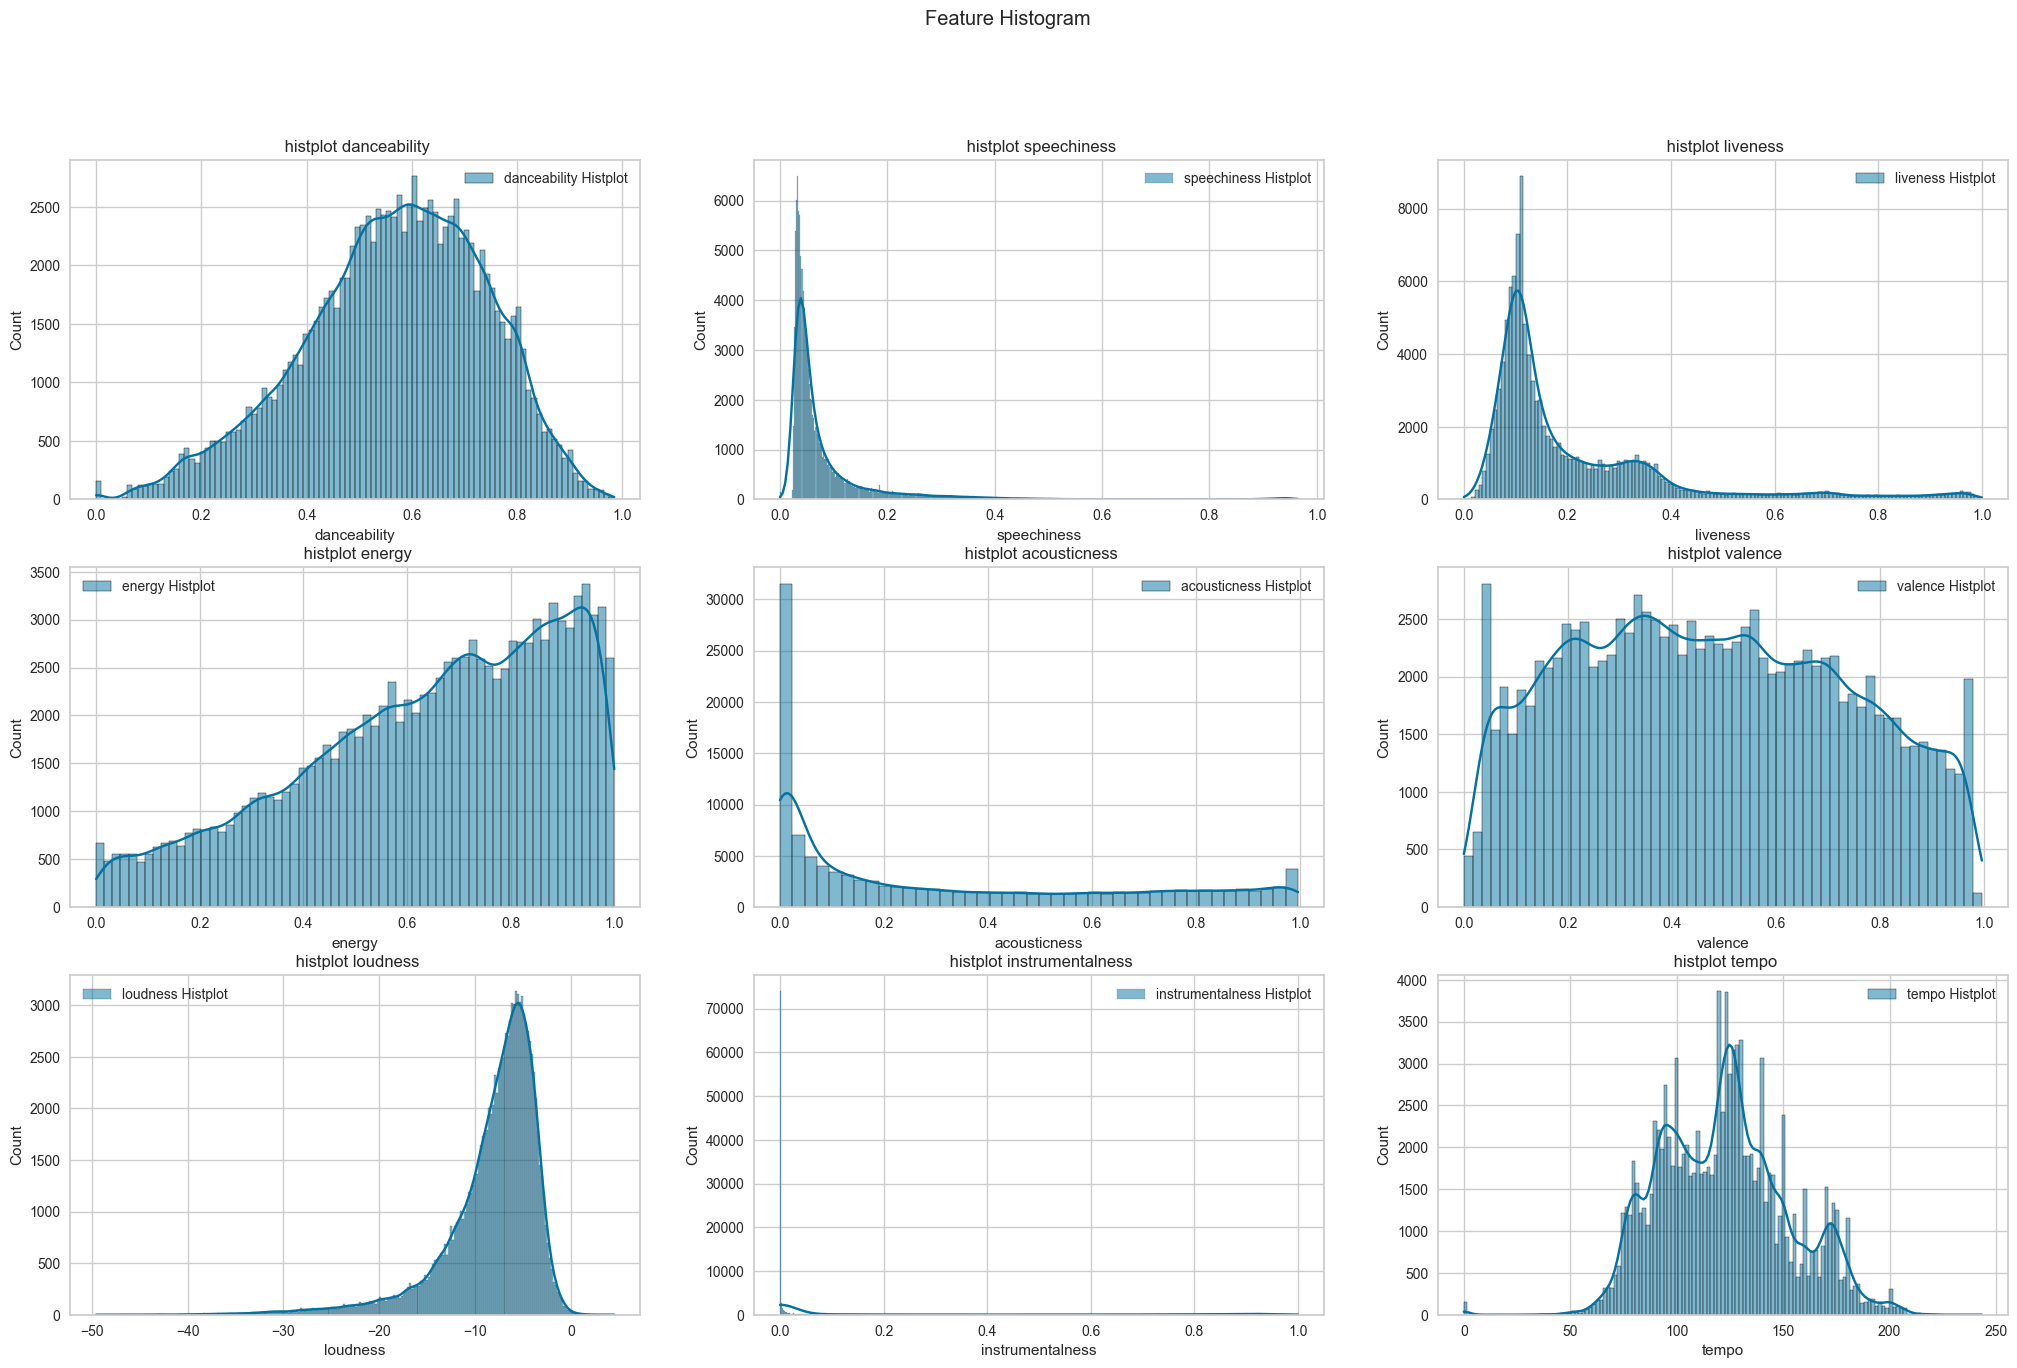

In [279]:
fig,ax=plt.subplots(3,3,figsize=(25,15))
for i ,feature in enumerate(col_float):
    row=i%3
    col=i//3
    sns.histplot(df[feature],kde=True,alpha=0.5,label="{} Histplot".format(feature),ax=ax[row,col])
    ax[row,col].set_title(" histplot {}".format(feature))
    ax[row,col].grid(True)
    ax[row,col].legend()
    
plt.suptitle("Feature Histogram")
plt.show()

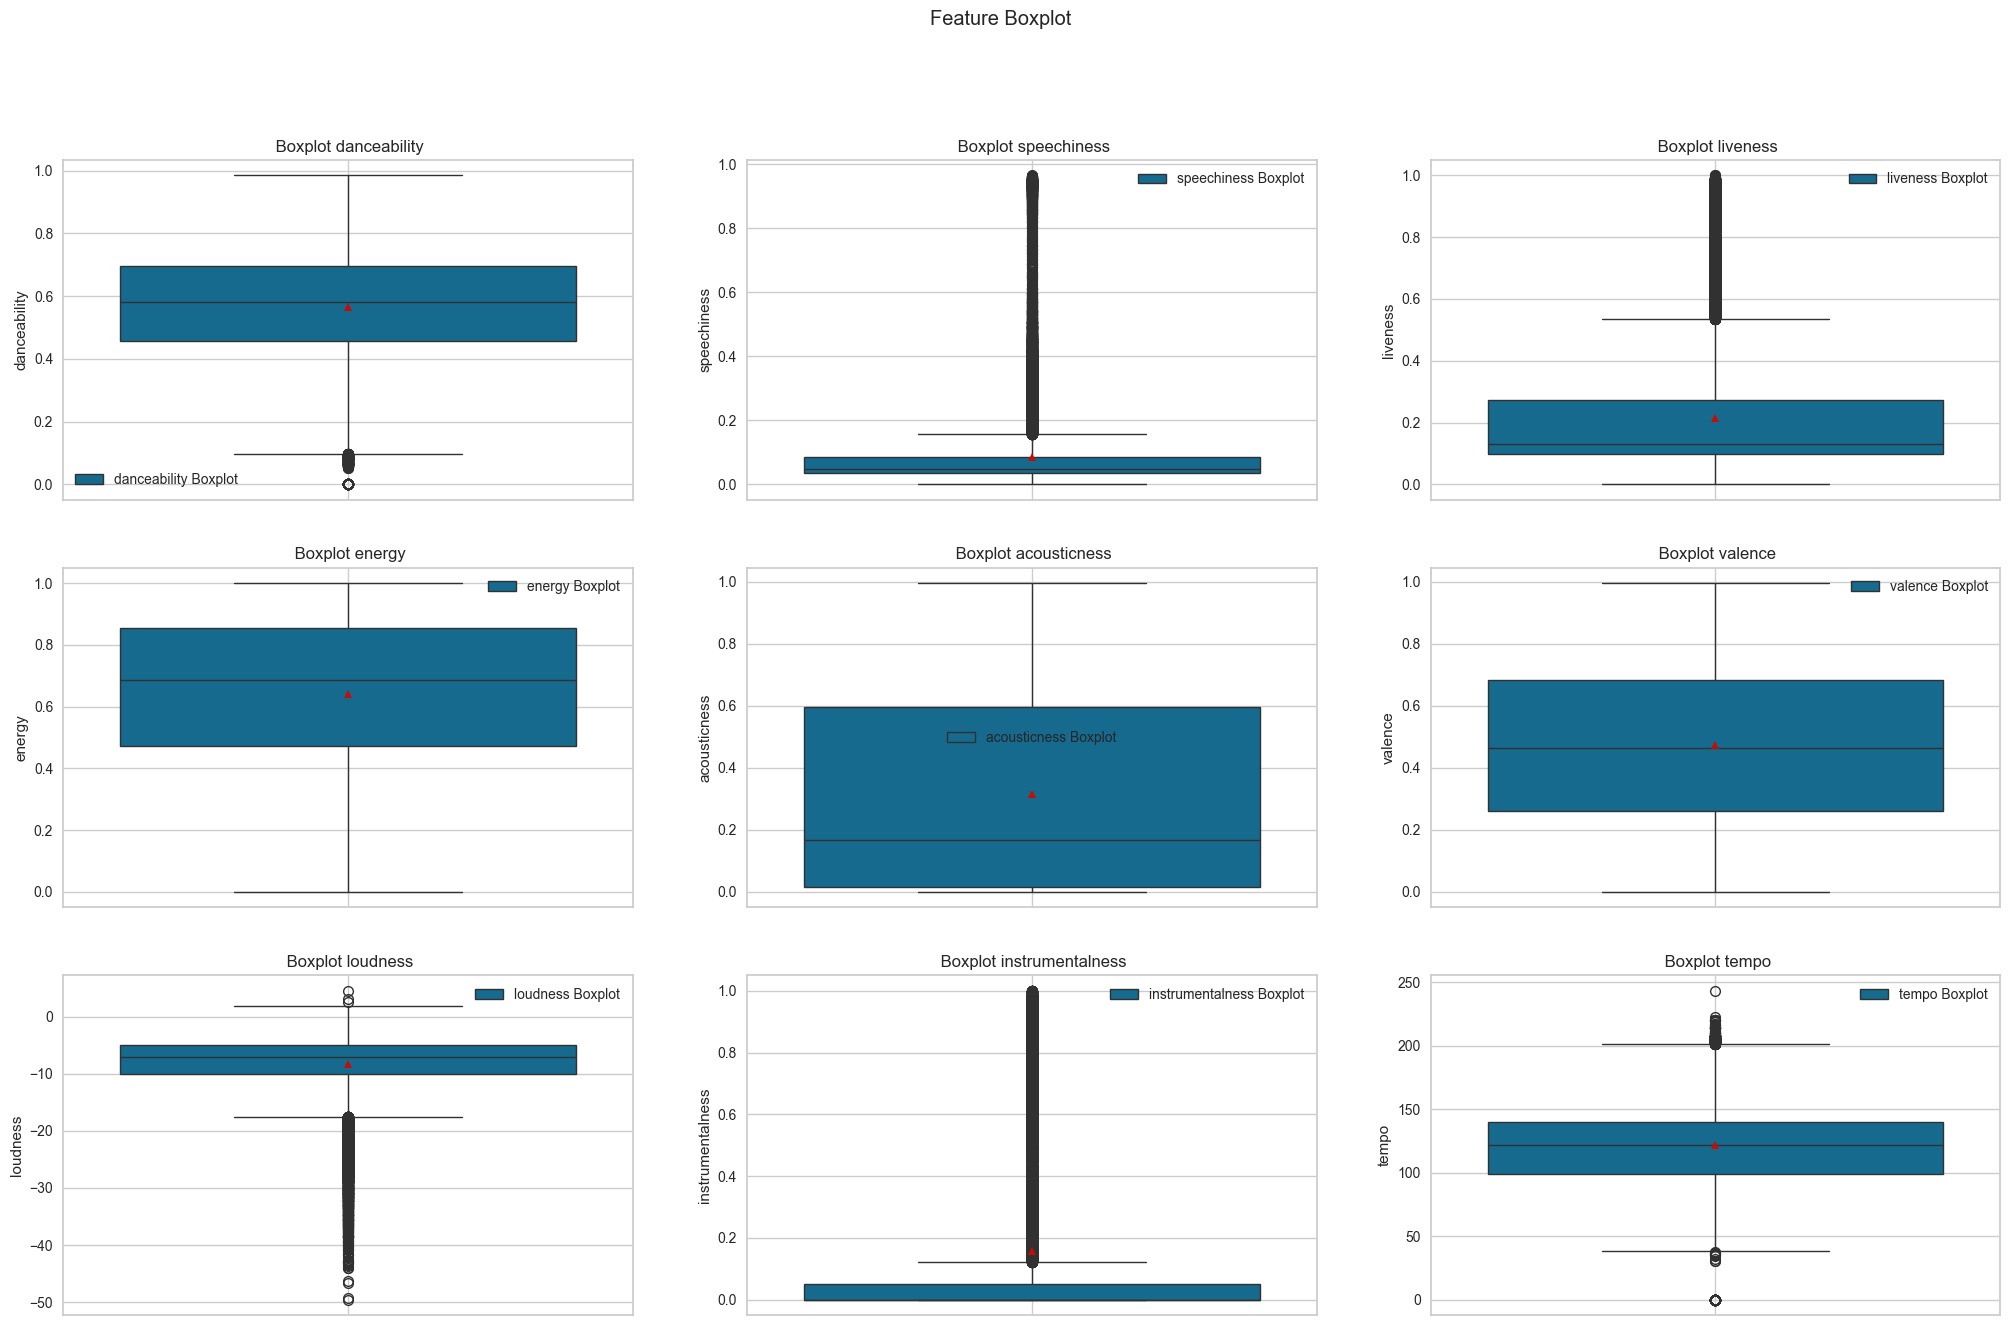

In [280]:
fig,ax=plt.subplots(3,3,figsize=(25,15))
for i ,feature in enumerate(col_float):
    row=i%3
    col=i//3
    sns.boxplot(df[feature],showmeans=True,label="{} Boxplot".format(feature),ax=ax[row,col])
    ax[row,col].set_title(" Boxplot {}".format(feature))
    ax[row,col].grid(True)
    ax[row,col].legend()
    
plt.suptitle("Feature Boxplot")
plt.show()

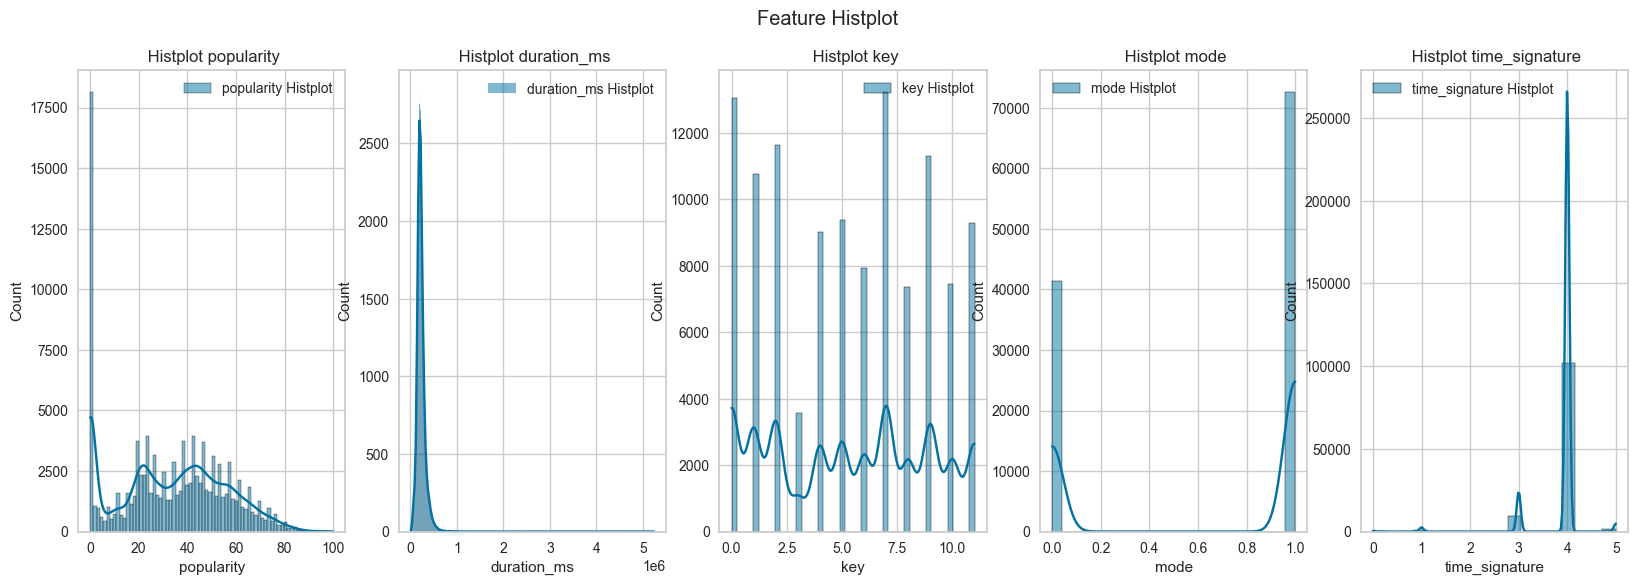

In [281]:
col_int=['popularity', 'duration_ms', 'key', 'mode',
       'time_signature']
fig,ax=plt.subplots(1,5,figsize=(20,6))
for i ,feature in enumerate(col_int):
    col=i%5
    sns.histplot(df[feature],kde=True,alpha=0.5,label="{} Histplot".format(feature),ax=ax[col])
    ax[col].set_title(" Histplot {}".format(feature))
    ax[col].grid(True)
    ax[col].legend()
    
plt.suptitle("Feature Histplot")
plt.show()

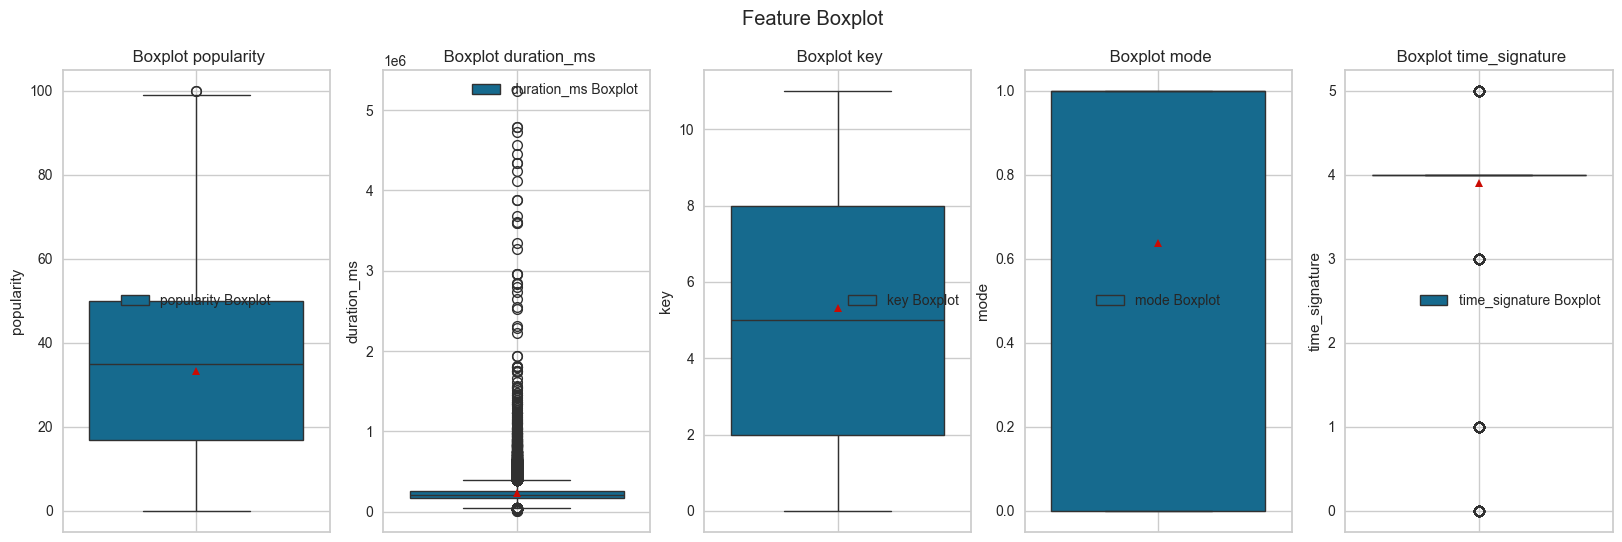

In [282]:
col_int=['popularity', 'duration_ms', 'key', 'mode',
       'time_signature']
fig,ax=plt.subplots(1,5,figsize=(20,6))
for i ,feature in enumerate(col_int):
    col=i%5
    sns.boxplot(df[feature],showmeans=True,label="{} Boxplot".format(feature),ax=ax[col])
    ax[col].set_title(" Boxplot {}".format(feature))
    ax[col].grid(True)
    ax[col].legend()
    
plt.suptitle("Feature Boxplot")
plt.show()


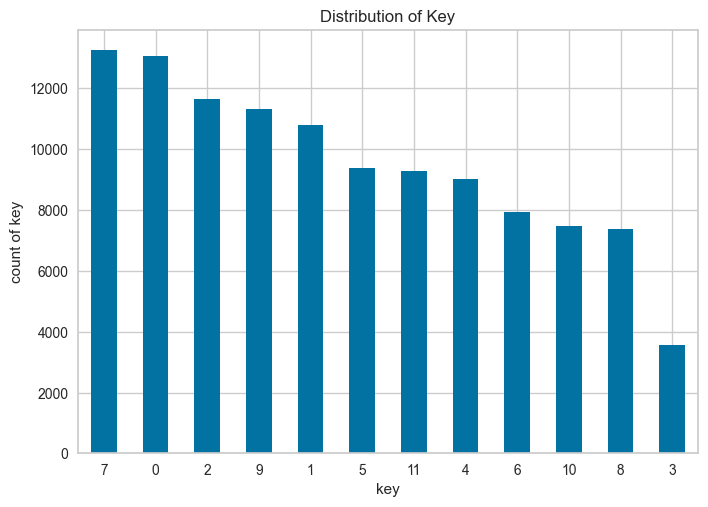

In [283]:
df["key"].value_counts().plot(kind="bar")
plt.xticks(rotation=True)
plt.xlabel("key")
plt.ylabel("count of key")
plt.title("Distribution of Key")
plt.grid(True)
plt.show()

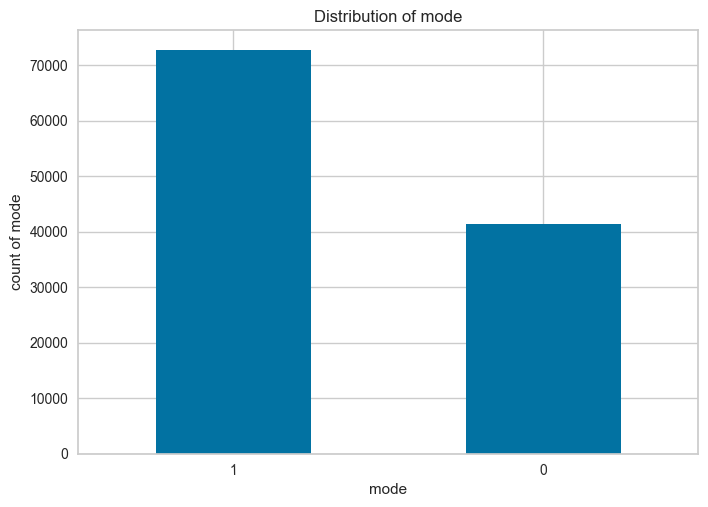

In [284]:
df["mode"].value_counts().plot(kind="bar")
plt.xticks(rotation=True)
plt.xlabel("mode")
plt.ylabel("count of mode")
plt.title("Distribution of mode")
plt.grid(True)
plt.show()

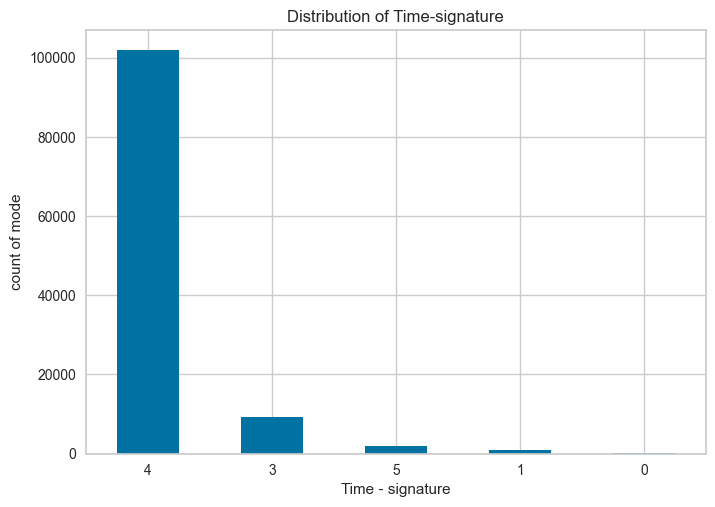

In [285]:
df["time_signature"].value_counts().plot(kind="bar")
plt.xticks(rotation=True)
plt.xlabel("Time - signature")
plt.ylabel("count of mode")
plt.title("Distribution of Time-signature")
plt.grid(True)
plt.show()

In [286]:
object_columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], dtype='object')

In [287]:
artist=df["artists"].value_counts().sort_values(ascending=False).reset_index().head(10)
artist

artists  count
0      The Beatles    279
1     George Jones    271
2    Stevie Wonder    236
3      Linkin Park    224
4  Ella Fitzgerald    222
5    Prateek Kuhad    217
6             Feid    202
7      Chuck Berry    190
8  Håkan Hellström    183
9      OneRepublic    181

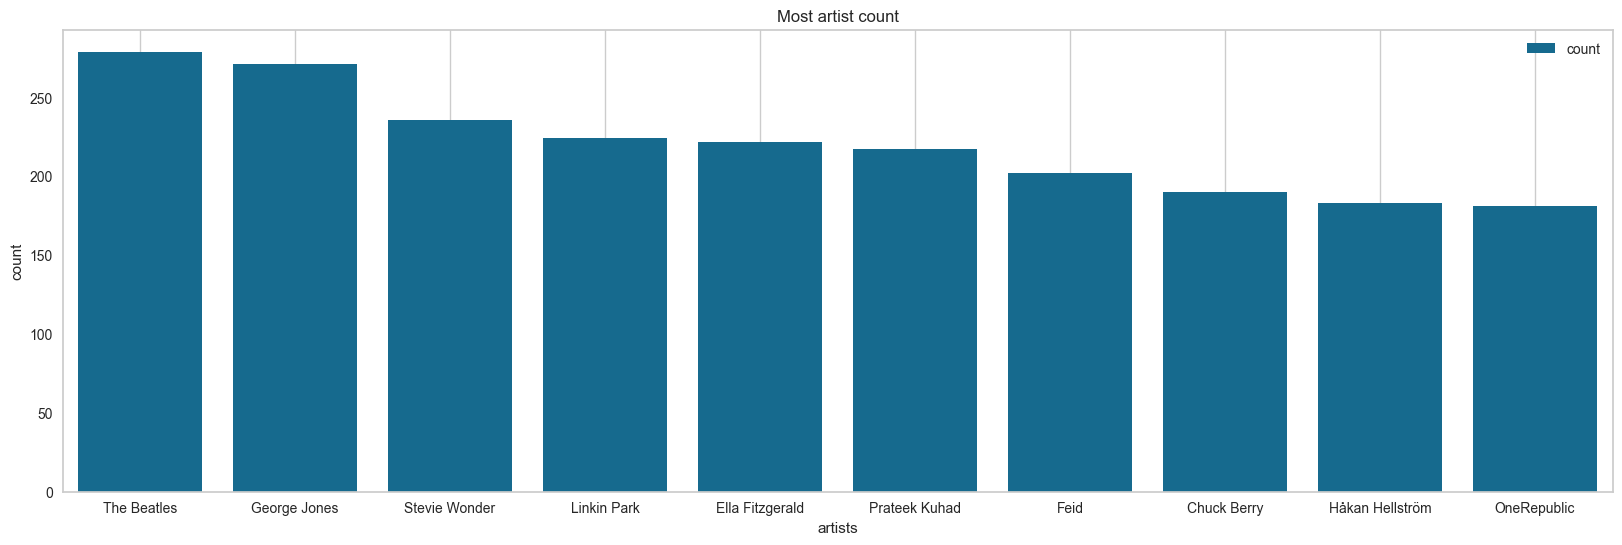

In [288]:
plt.figure(figsize=(20,6))
sns.barplot(x=artist["artists"],y=artist["count"],label="count")
plt.title("Most artist count")
plt.grid()
plt.legend()
plt.show()

In [289]:
album_name=df["album_name"].value_counts().sort_values(ascending=False).reset_index().head(10)
album_name

album_name  count
0   Alternative Christmas 2022    195
1  Feliz Cumpleaños con Perreo    184
2                        Metal    143
3       Halloween con perreito    123
4         Halloween Party 2022    115
5   The Complete Hank Williams    111
6              Fiesta portatil    110
7            Frescura y Perreo    106
8        Esto me suena a Farra    105
9          Perreo en Halloween    103

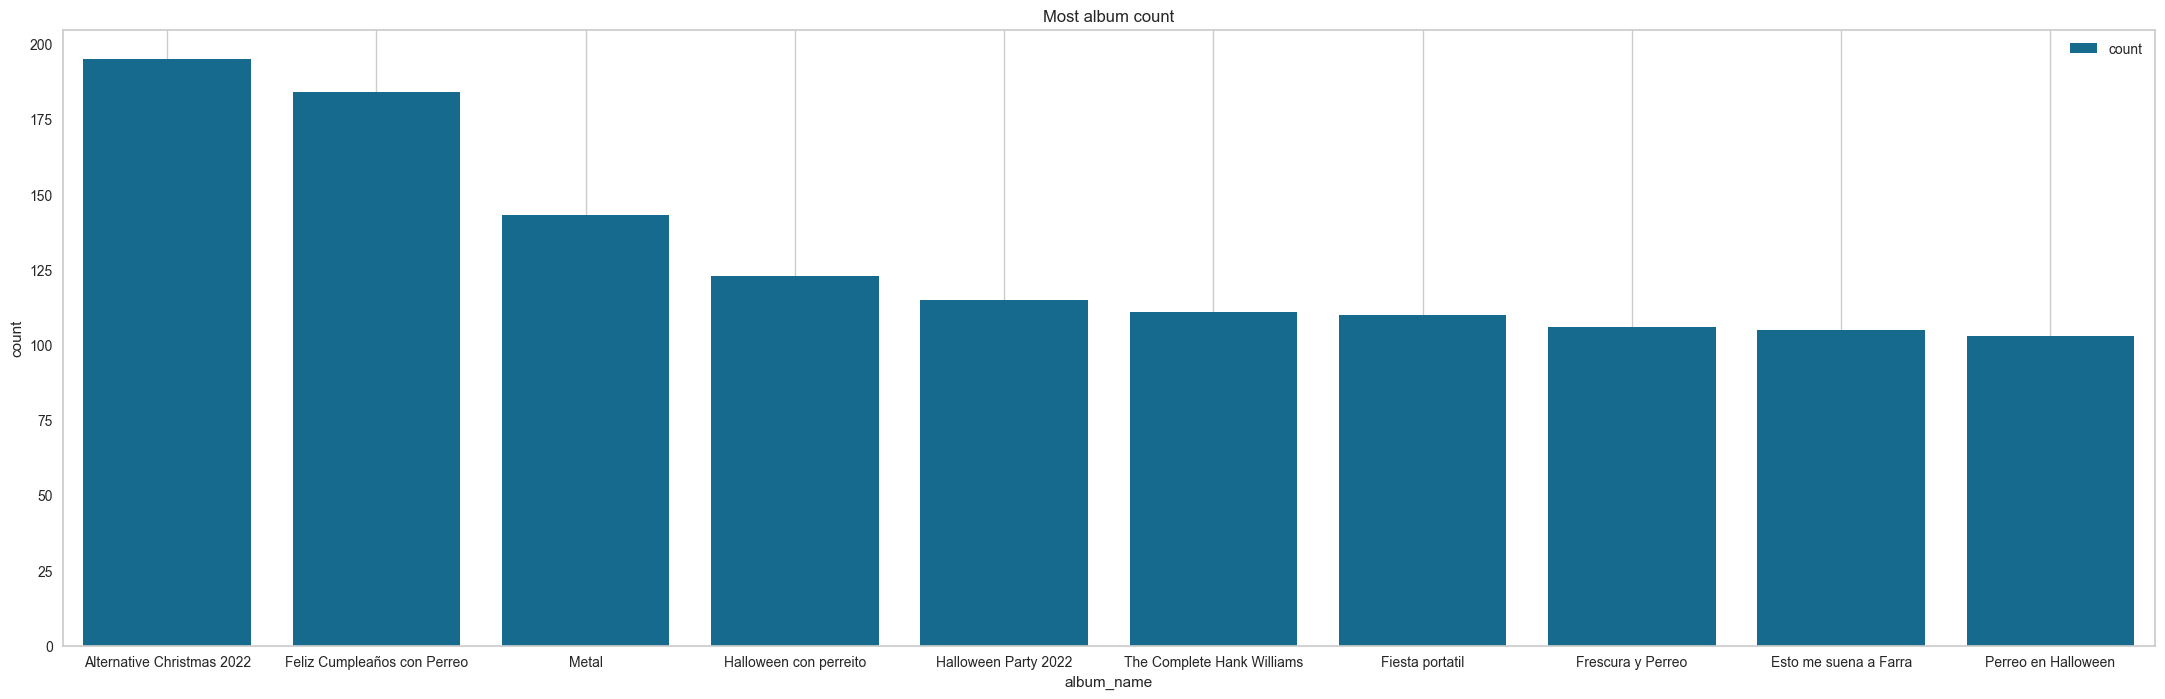

In [290]:
plt.figure(figsize=(27,8))
sns.barplot(x=album_name["album_name"],y=album_name["count"],label="count")
plt.title("Most album count")
plt.grid()
plt.legend()
plt.show()

In [291]:
track_name=df["track_name"].value_counts().sort_values(ascending=False).reset_index().head(10)
track_name

track_name  count
0                 Run Rudolph Run    151
1                       Halloween     88
2              Frosty The Snowman     81
3  Little Saint Nick - 1991 Remix     76
4                       Last Last     75
5                  Christmas Time     72
6          CÓMO SE SIENTE - Remix     64
7                     Sleigh Ride     61
8                        RUMBATÓN     60
9                    X ÚLTIMA VEZ     58

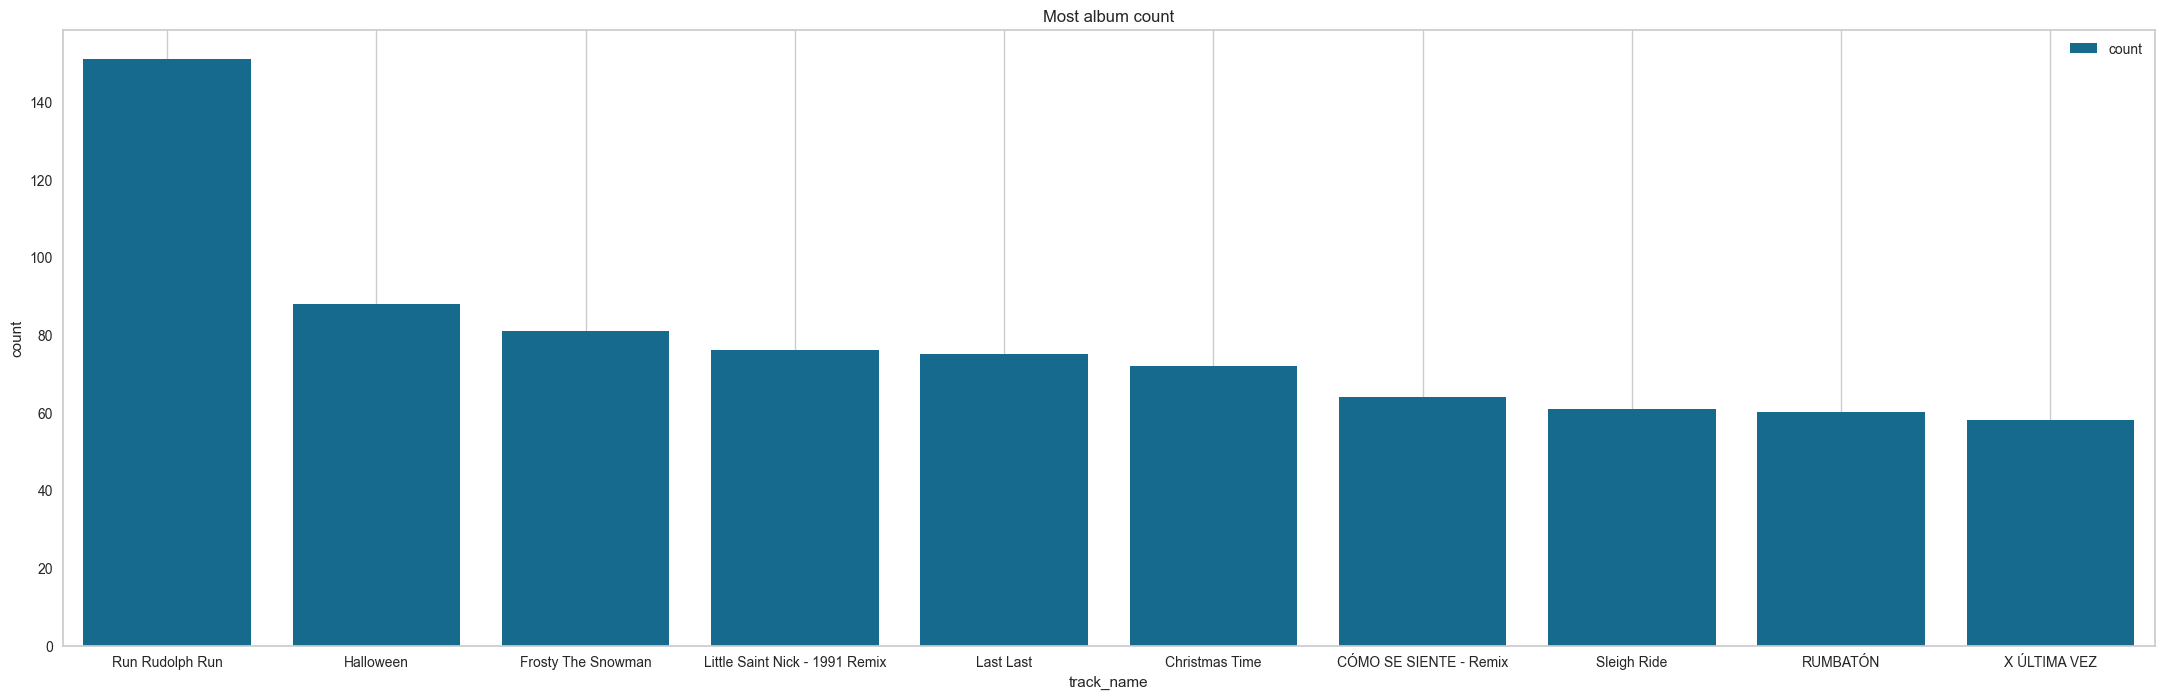

In [292]:
plt.figure(figsize=(27,8))
sns.barplot(x=track_name["track_name"],y=track_name["count"],label="count")
plt.title("Most album count")
plt.grid()
plt.legend()
plt.show()

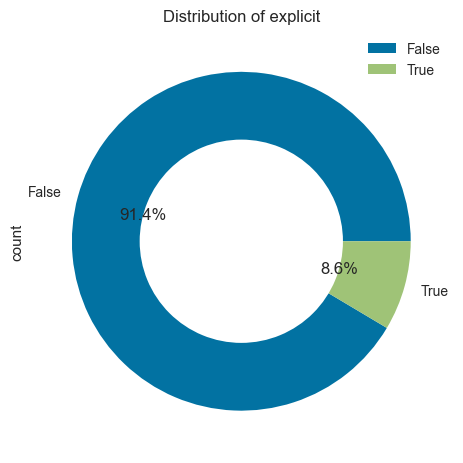

In [293]:
df["explicit"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.pie([1],colors="white",radius=0.6)
plt.title("Distribution of explicit")
plt.legend(loc=1)
plt.show()

### Bivariate Analysis

#### Relation between Popularity and track genre

In [294]:
popularity=df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).reset_index().head(10)
popularity

track_genre  popularity
0    pop-film   59.283000
1       k-pop   56.952953
2       chill   53.651000
3         sad   52.379000
4      grunge   49.594000
5      indian   49.539000
6       anime   48.772000
7         emo   48.128000
8   sertanejo   47.866000
9         pop   47.576000

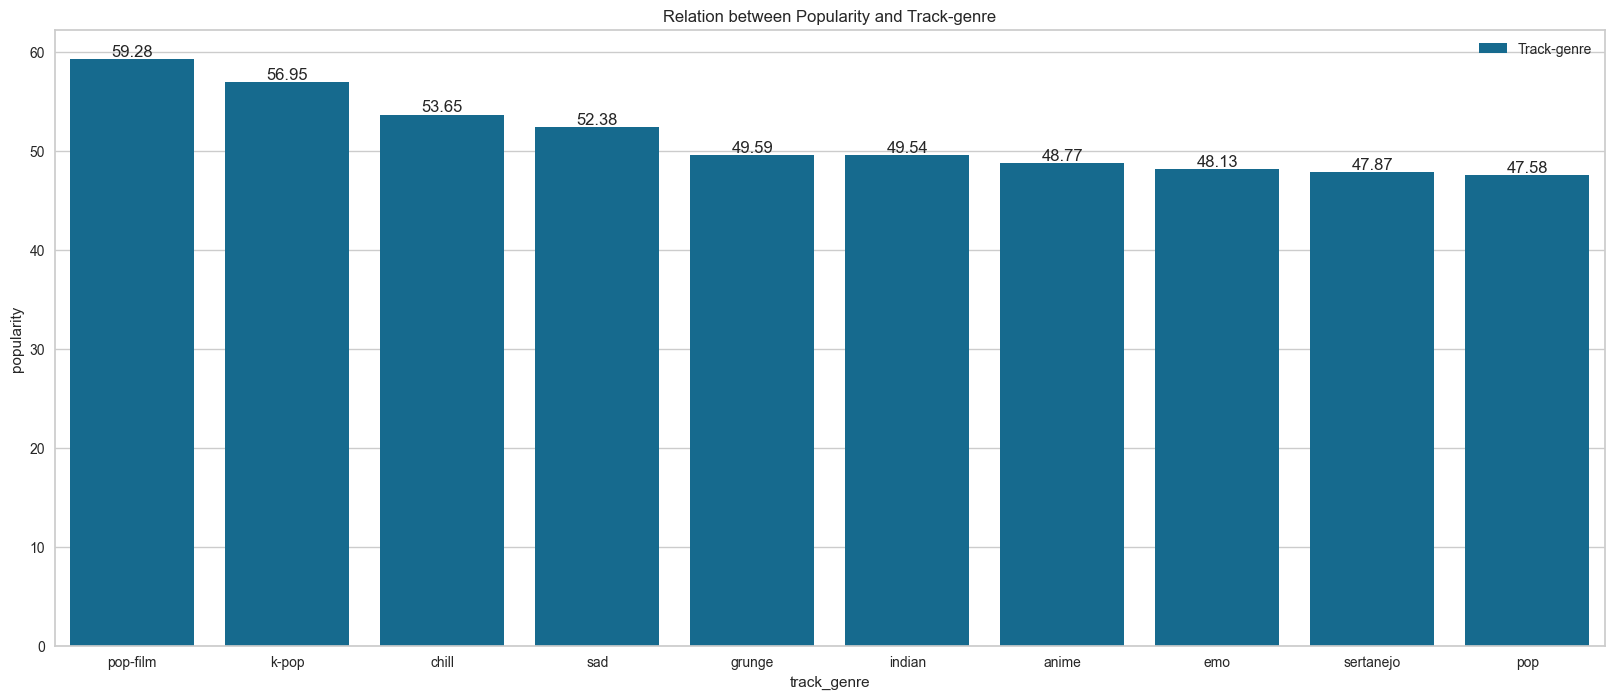

In [295]:
plt.figure(figsize=(20,8))
bars=sns.barplot(x=popularity["track_genre"],y=popularity["popularity"],label="Track-genre")
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Relation between Popularity and Track-genre")
plt.legend()
plt.show()


#### Relation between Track-genre to duration-ms

In [296]:
duration_ms=df.groupby("track_genre")["duration_ms"].mean().sort_values(ascending=False).reset_index().head(10)
duration_ms

track_genre  duration_ms
0  detroit-techno   372012.402
1  minimal-techno   368863.246
2   chicago-house   366853.868
3       breakbeat   321762.218
4         iranian   319709.537
5          gospel   313218.041
6          techno   312311.477
7     black-metal   311103.115
8         new-age   299070.683
9     world-music   297195.622

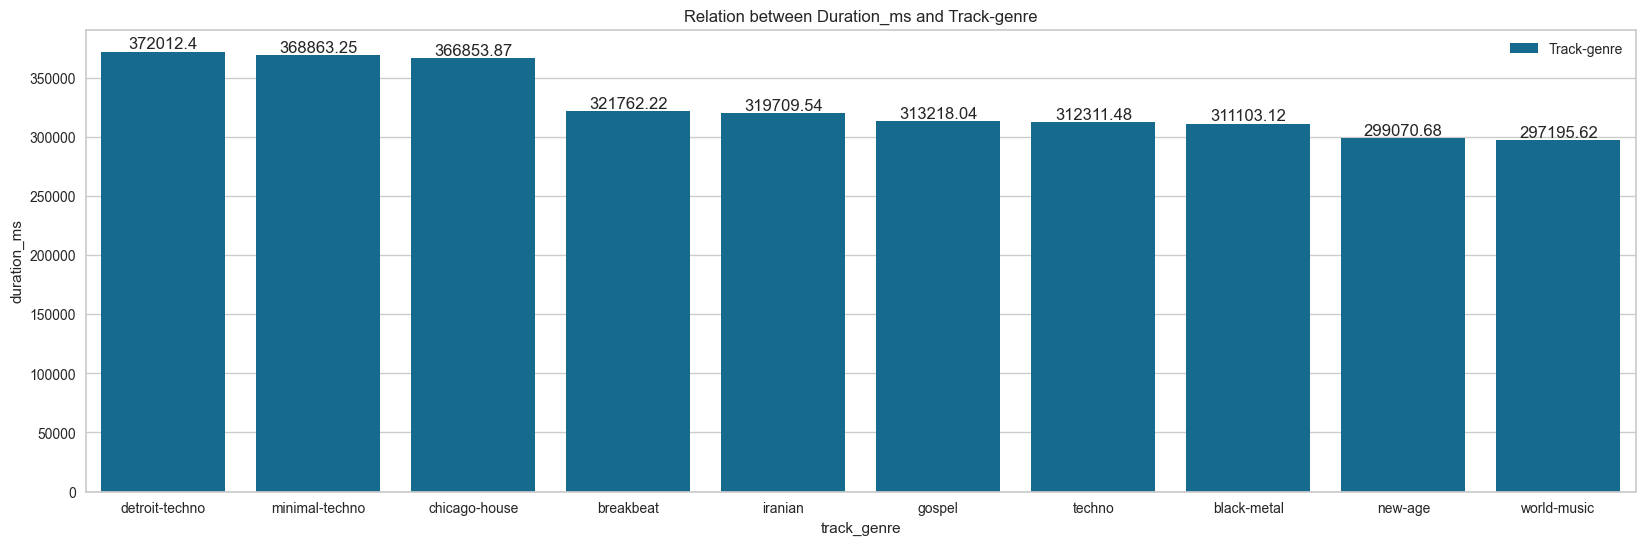

In [297]:
plt.figure(figsize=(20,6))
bars=sns.barplot(x=duration_ms['track_genre'],y=duration_ms['duration_ms'],label="Track-genre")
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Relation between Duration_ms and Track-genre")
plt.legend()
plt.show()

#### Danceability with track-genre

In [298]:
danceability=df.groupby("track_genre")["danceability"].mean().sort_values(ascending=False).reset_index().head(10)
danceability

track_genre  danceability
0            kids      0.778906
1   chicago-house      0.766176
2       reggaeton      0.758521
3          latino      0.757057
4          reggae      0.745331
5         hip-hop      0.736154
6       dancehall      0.734169
7  minimal-techno      0.729395
8  detroit-techno      0.722568
9           latin      0.721902

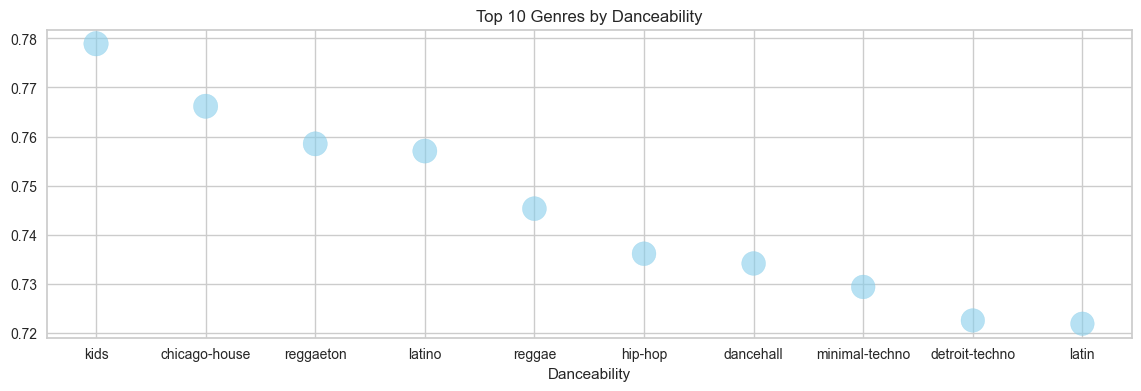

In [299]:
plt.figure(figsize=(14,4))
plt.scatter(danceability["track_genre"],danceability["danceability"],s=danceability["danceability"]*400,  
    alpha=0.6,
    color='skyblue'
)
plt.title("Top 10 Genres by Danceability")
plt.xlabel("Danceability")
plt.show()


#### Energy

In [300]:
energy=df.groupby("track_genre")["energy"].mean().sort_values(ascending=False).reset_index().head(10)
energy

track_genre    energy
0    death-metal  0.931470
1      grindcore  0.924201
2      metalcore  0.914485
3          happy  0.910971
4      hardstyle  0.901246
5  drum-and-bass  0.876635
6    black-metal  0.874897
7    heavy-metal  0.874003
8          party  0.871237
9         j-idol  0.868677

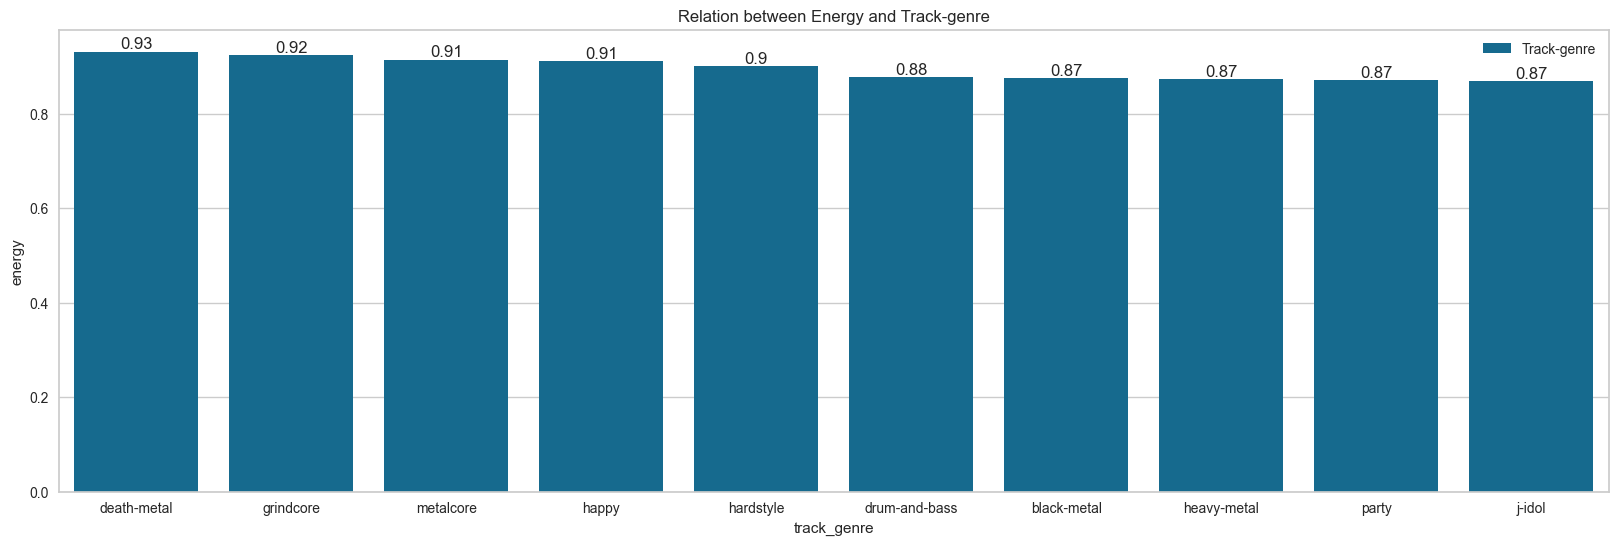

In [301]:
plt.figure(figsize=(20,6))
bars=sns.barplot(x=energy['track_genre'],y=energy['energy'],label="Track-genre")
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Relation between Energy and Track-genre")
plt.legend()
plt.show()

### Loudness

In [302]:
loudness=df.groupby("track_genre")["loudness"].mean().sort_values(ascending=False).reset_index().head(10)
loudness

track_genre  loudness
0         j-idol -3.771215
1  drum-and-bass -4.159624
2      hardstyle -4.345983
3          party -4.411871
4      metalcore -4.457694
5      reggaeton -4.987124
6        dubstep -5.063413
7          forro -5.122201
8         latino -5.176923
9          latin -5.263596

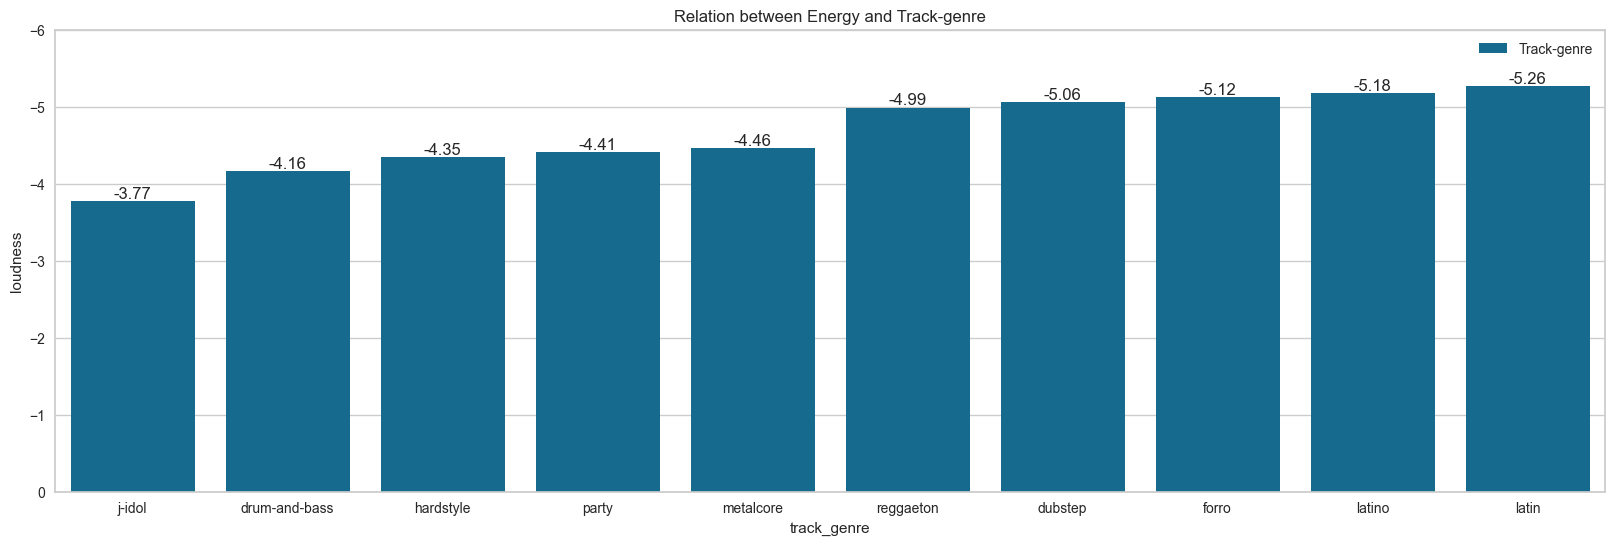

In [303]:
plt.figure(figsize=(20,6))
bars=sns.barplot(x=loudness["track_genre"],y=loudness["loudness"],label="Track-genre")
plt.ylim([0,-6])
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Relation between Energy and Track-genre")
plt.legend()
plt.show()

#### Speechiness

In [304]:
df.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [305]:
speechiness=df.groupby("track_genre")["speechiness"].mean().sort_values(ascending=False).reset_index().head(10)
speechiness

track_genre  speechiness
0      comedy     0.755625
1     j-dance     0.220405
2   dancehall     0.186986
3        kids     0.152846
4        funk     0.151649
5    hardcore     0.149354
6   grindcore     0.137471
7         sad     0.130431
8     hip-hop     0.130353
9      french     0.126647

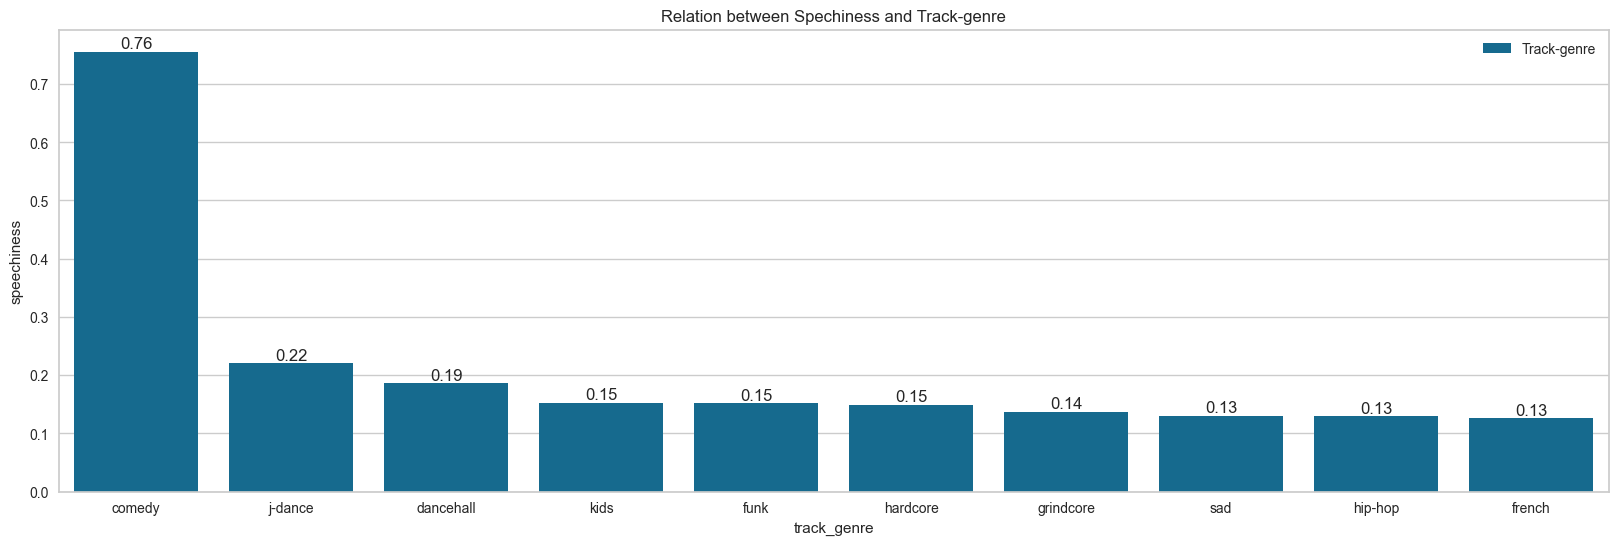

In [306]:
plt.figure(figsize=(20,6))
bars=sns.barplot(x=speechiness["track_genre"],y=speechiness["speechiness"],label="Track-genre")
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Relation between Spechiness and Track-genre")
plt.legend()
plt.show()

#### acousticness

In [307]:
Acousticness=df.groupby("track_genre")["acousticness"].mean().sort_values(ascending=False).reset_index().head(10)
Acousticness

track_genre  acousticness
0   classical      0.920049
1     romance      0.869495
2       tango      0.846209
3     new-age      0.824022
4       opera      0.794931
5     ambient      0.776790
6      guitar      0.773053
7      disney      0.742892
8      comedy      0.726476
9        jazz      0.715816

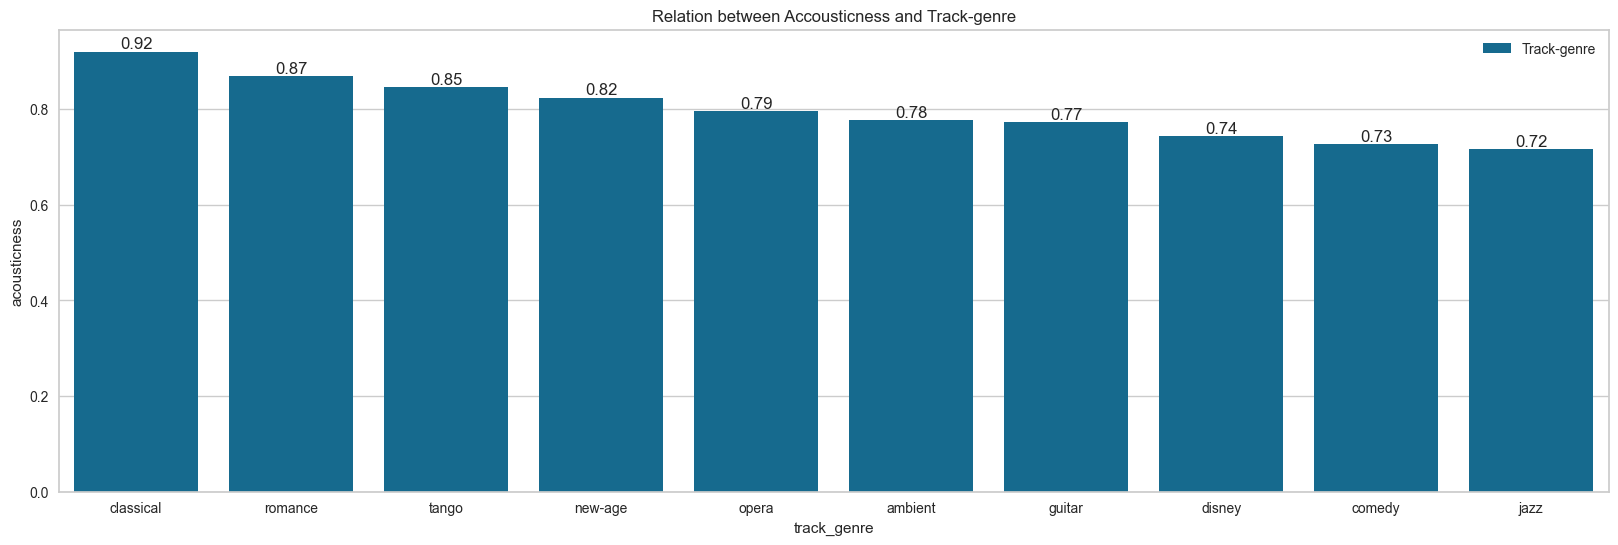

In [308]:
plt.figure(figsize=(20,6))
bars=sns.barplot(x=Acousticness["track_genre"],y=Acousticness["acousticness"],label="Track-genre")
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Relation between Accousticness and Track-genre")
plt.legend()
plt.show()

In [309]:
instrumentalness=df.groupby("track_genre")["instrumentalness"].mean().sort_values(ascending=False).reset_index().head(10)
instrumentalness

track_genre  instrumentalness
0           study          0.789757
1  minimal-techno          0.744538
2           sleep          0.723539
3         new-age          0.713021
4  detroit-techno          0.699548
5         ambient          0.676221
6             idm          0.674931
7       classical          0.619208
8         iranian          0.589848
9          techno          0.540038

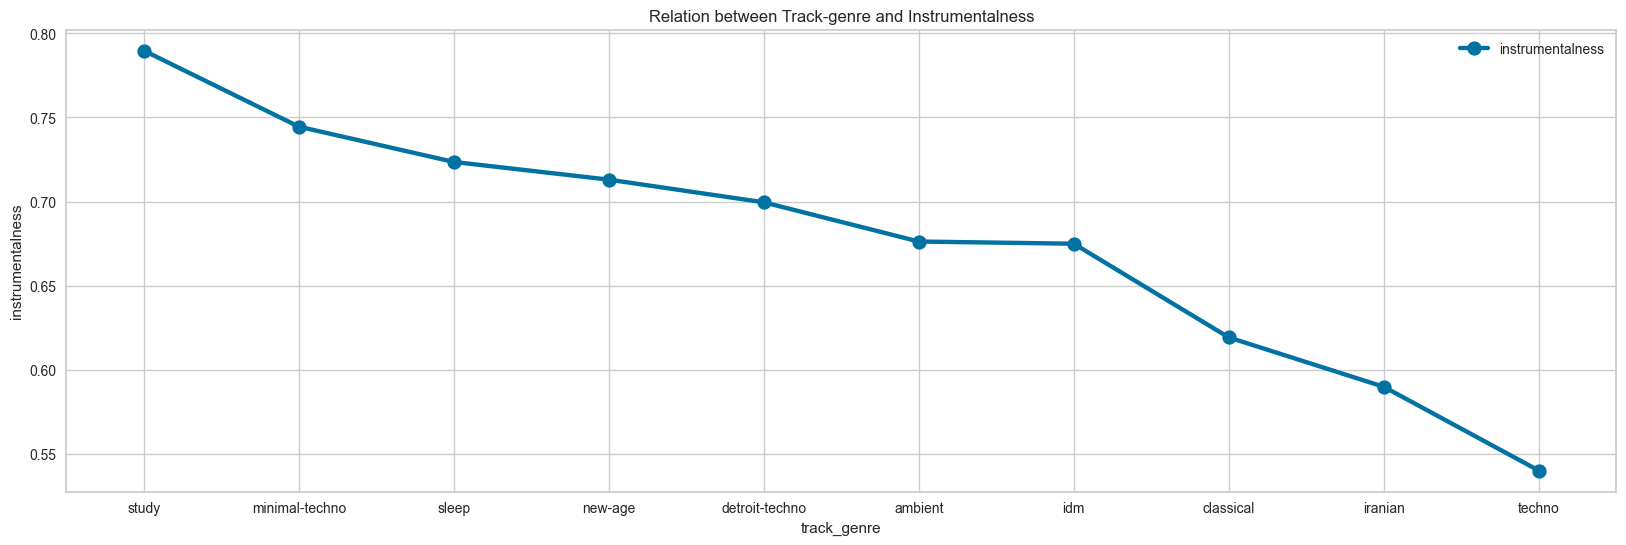

In [310]:
plt.figure(figsize=(20,6))
sns.pointplot(x=instrumentalness["track_genre"],y=instrumentalness["instrumentalness"],label="instrumentalness")
plt.grid(True)
plt.title("Relation between Track-genre and Instrumentalness")
plt.show()

#### Liveness

In [311]:
df.head(1)

track_id      artists album_name track_name  popularity  \
0  5SuOikwiRyPMVoIQDJUgSV  Gen Hoshino     Comedy     Comedy          73   

   duration_ms  explicit  danceability  energy  key  loudness  mode  \
0       230666     False         0.676   0.461    1    -6.746     0   

   speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
0        0.143        0.0322          0.000001     0.358    0.715  87.917   

   time_signature track_genre  
0               4    acoustic

In [312]:
liveness=df.groupby("track_genre")["liveness"].mean().sort_values(ascending=False).reset_index().head(10)
liveness

track_genre  liveness
0      comedy  0.661666
1      pagode  0.519864
2   sertanejo  0.474224
3       samba  0.443192
4       sleep  0.357736
5         mpb  0.339464
6      gospel  0.298669
7      brazil  0.297962
8       forro  0.294971
9       party  0.287739

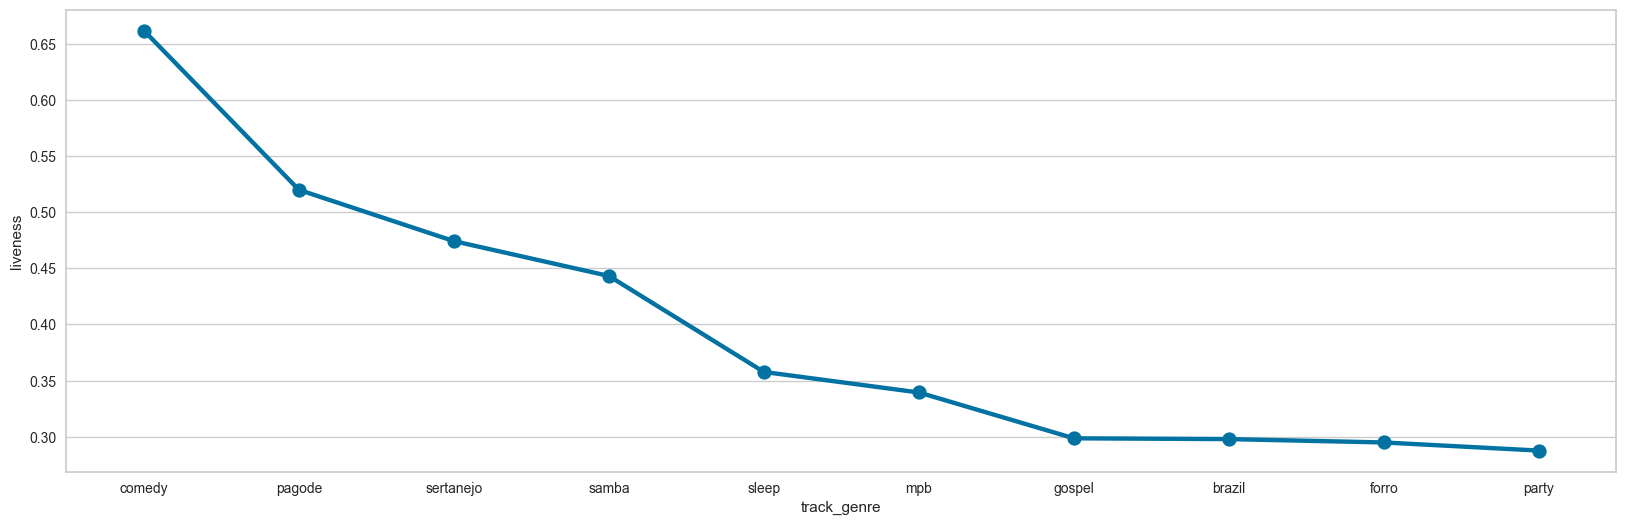

In [313]:
plt.figure(figsize=(20,6))
sns.pointplot(x=liveness["track_genre"],y=liveness["liveness"])
plt.show()

#### Valence 

In [314]:
valence=df.groupby("track_genre")["valence"].mean().sort_values(ascending=False).reset_index().head(10)
valence

track_genre   valence
0       salsa  0.814838
1       forro  0.760693
2  rockabilly  0.726951
3    afrobeat  0.698619
4         ska  0.696720
5    children  0.694287
6       samba  0.693409
7      pagode  0.687978
8       party  0.681235
9        kids  0.680864

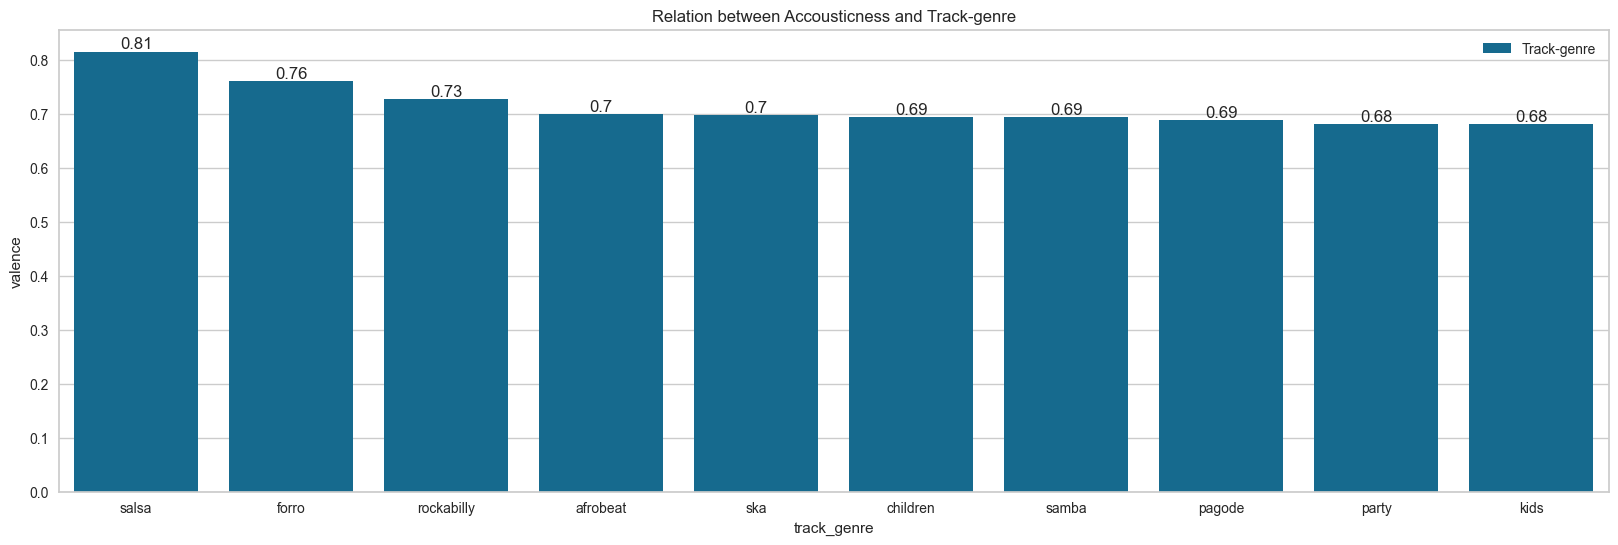

In [315]:
plt.figure(figsize=(20,6))
bars=sns.barplot(x=valence["track_genre"],y=valence["valence"],label="Track-genre")
for i in bars.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Relation between Accousticness and Track-genre")
plt.legend()
plt.show()

#### Tempo

In [316]:
tempo=df.groupby("track_genre")["tempo"].mean().sort_values(ascending=False).reset_index().head(10)
tempo

track_genre       tempo
0  drum-and-bass  155.241712
1          happy  152.908962
2      hardstyle  146.837452
3          forro  140.362197
4         j-idol  136.112004
5      power-pop  134.651615
6        dubstep  133.631709
7           punk  133.600518
8         trance  133.276726
9      breakbeat  133.030213

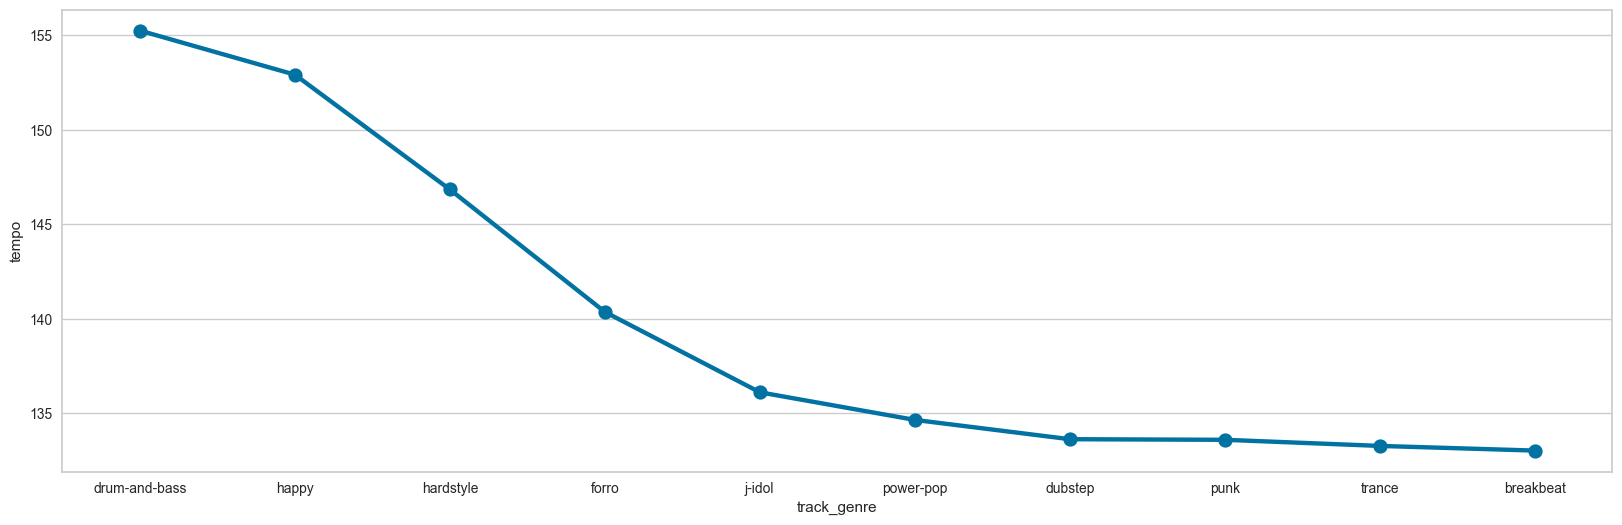

In [317]:
plt.figure(figsize=(20,6))
sns.pointplot(x=tempo["track_genre"],y=tempo["tempo"])
plt.show()

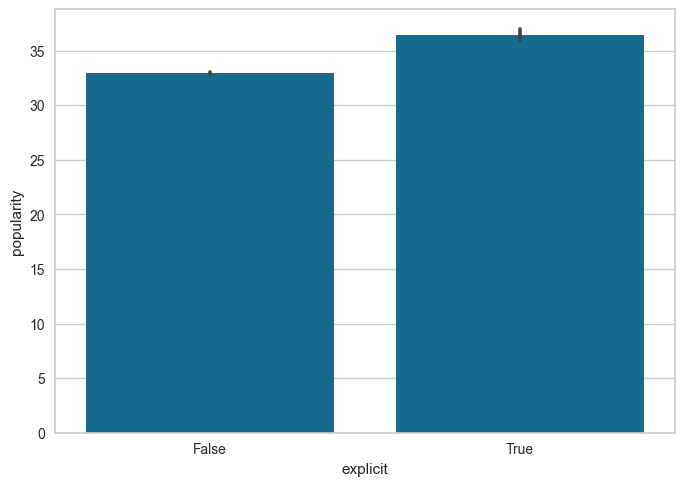

In [318]:
sns.barplot(x=df["explicit"],y=df["popularity"])
plt.show()

In [319]:
from scipy.stats import ttest_ind
ho="popularity has no effect with explicit"
h1="Popularity has effect on explicit"

explicit_0=df[df["explicit"]==True]["popularity"]
explicit_1=df[df["explicit"]==False]["popularity"]

t_stats,p_value=ttest_ind(explicit_0,explicit_1)
print(t_stats)
print(p_value)

if p_value>0.05:
    print("We failed to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

14.896799406169768
3.85500797421256e-50
We reject the null hypothesis


#### Multivariate Analysis

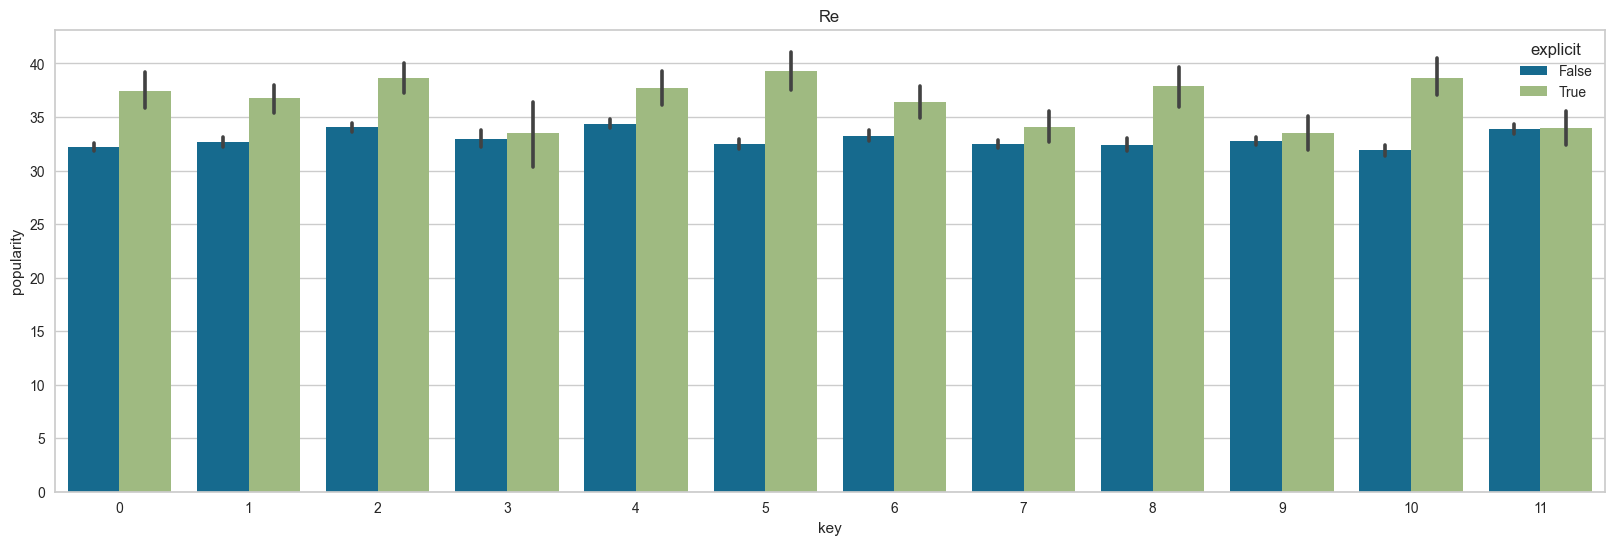

In [320]:
plt.figure(figsize=(20,6))
sns.barplot(x=df["key"],y=df["popularity"],hue=df["explicit"])
plt.title("Re")
plt.show()

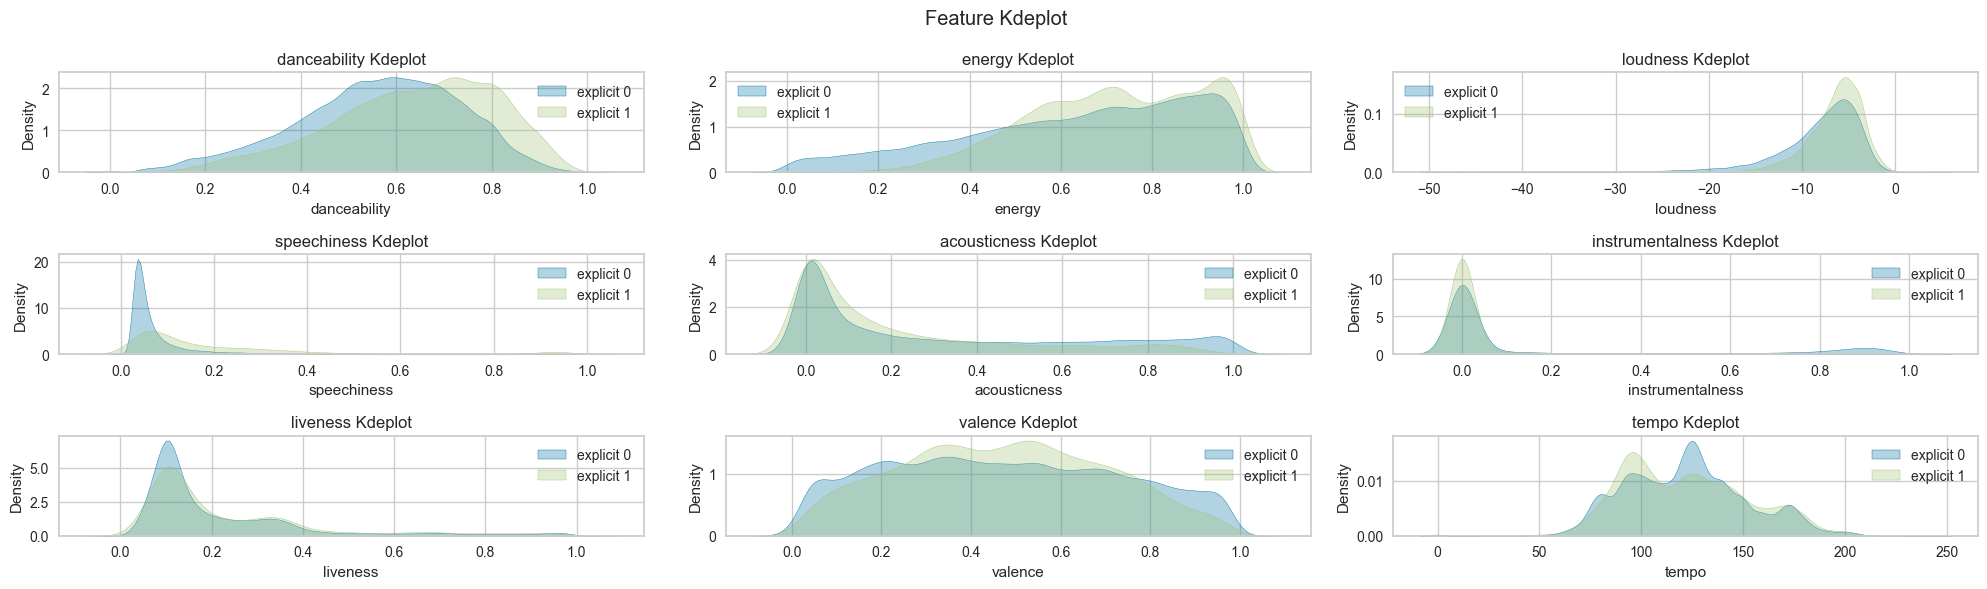

In [321]:
fig,ax=plt.subplots(3,3,figsize=(20,6))
col1=["danceability",	"energy",	"loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
for index,feature in enumerate(col1):
    row=index//3
    col=index%3
    sns.kdeplot(df[df["explicit"]==0][feature],fill=True,alpha=0.3,ax=ax[row,col],label="explicit 0")
    sns.kdeplot(df[df["explicit"]==1][feature],alpha=0.3,fill=True,ax=ax[row,col],label="explicit 1")
    ax[row,col].set_title("{} Kdeplot".format(feature))
    ax[row,col].legend()
plt.suptitle("Feature Kdeplot")
plt.tight_layout()
plt.show()

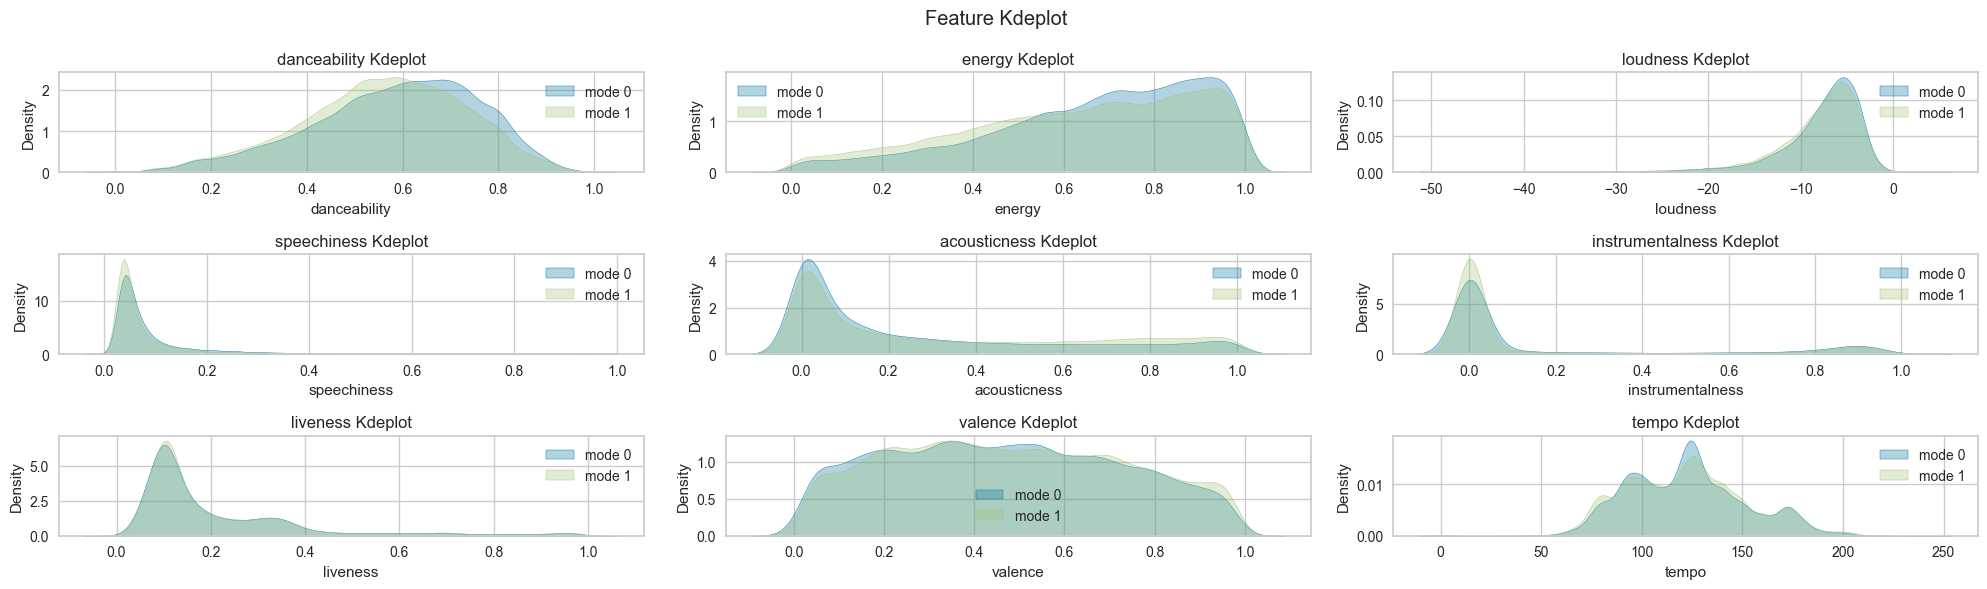

In [322]:
fig,ax=plt.subplots(3,3,figsize=(20,6))
col1=["danceability",	"energy",	"loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
for index,feature in enumerate(col1):
    row=index//3
    col=index%3
    sns.kdeplot(df[df["mode"]==0][feature],fill=True,alpha=0.3,ax=ax[row,col],label="mode 0")
    sns.kdeplot(df[df["mode"]==1][feature],alpha=0.3,fill=True,ax=ax[row,col],label="mode 1")
    ax[row,col].set_title("{} Kdeplot".format(feature))
    ax[row,col].legend()
plt.suptitle("Feature Kdeplot")
plt.tight_layout()
plt.show()

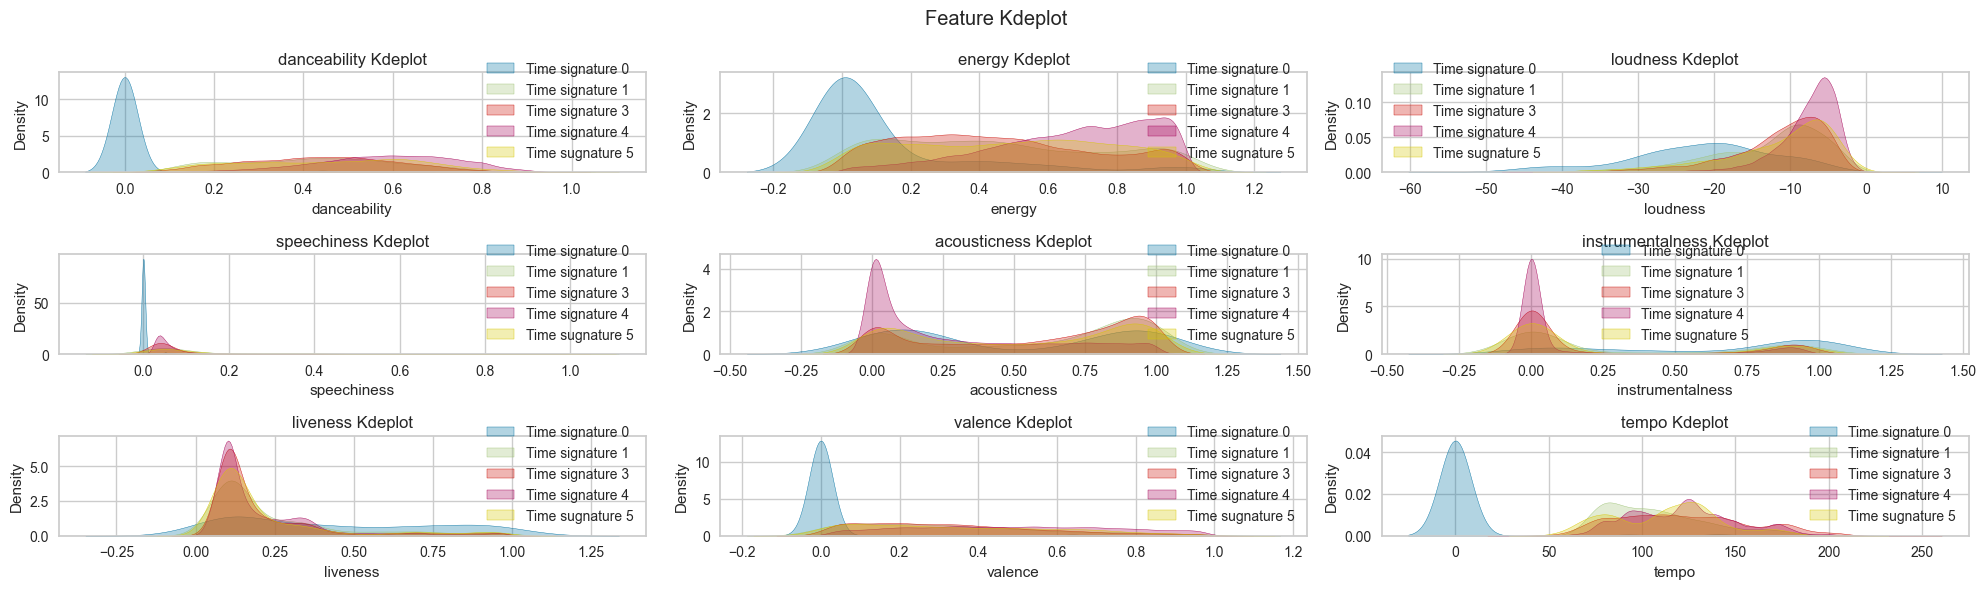

In [323]:
fig,ax=plt.subplots(3,3,figsize=(20,6))
col1=["danceability",	"energy",	"loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
for index,feature in enumerate(col1):
    row=index//3
    col=index%3
    sns.kdeplot(df[df["time_signature"]==0][feature],fill=True,alpha=0.3,ax=ax[row,col],label="Time signature 0")
    sns.kdeplot(df[df["time_signature"]==1][feature],alpha=0.3,fill=True,ax=ax[row,col],label="Time signature 1")
    sns.kdeplot(df[df["time_signature"]==3][feature],alpha=0.3,fill=True,ax=ax[row,col],label="Time signature 3")
    sns.kdeplot(df[df["time_signature"]==4][feature],alpha=0.3,fill=True,ax=ax[row,col],label="Time signature 4")
    sns.kdeplot(df[df["time_signature"]==5][feature],alpha=0.3,fill=True,ax=ax[row,col],label="Time sugnature 5")
    ax[row,col].set_title("{} Kdeplot".format(feature))
    ax[row,col].legend()
plt.suptitle("Feature Kdeplot")
plt.tight_layout()
plt.show()

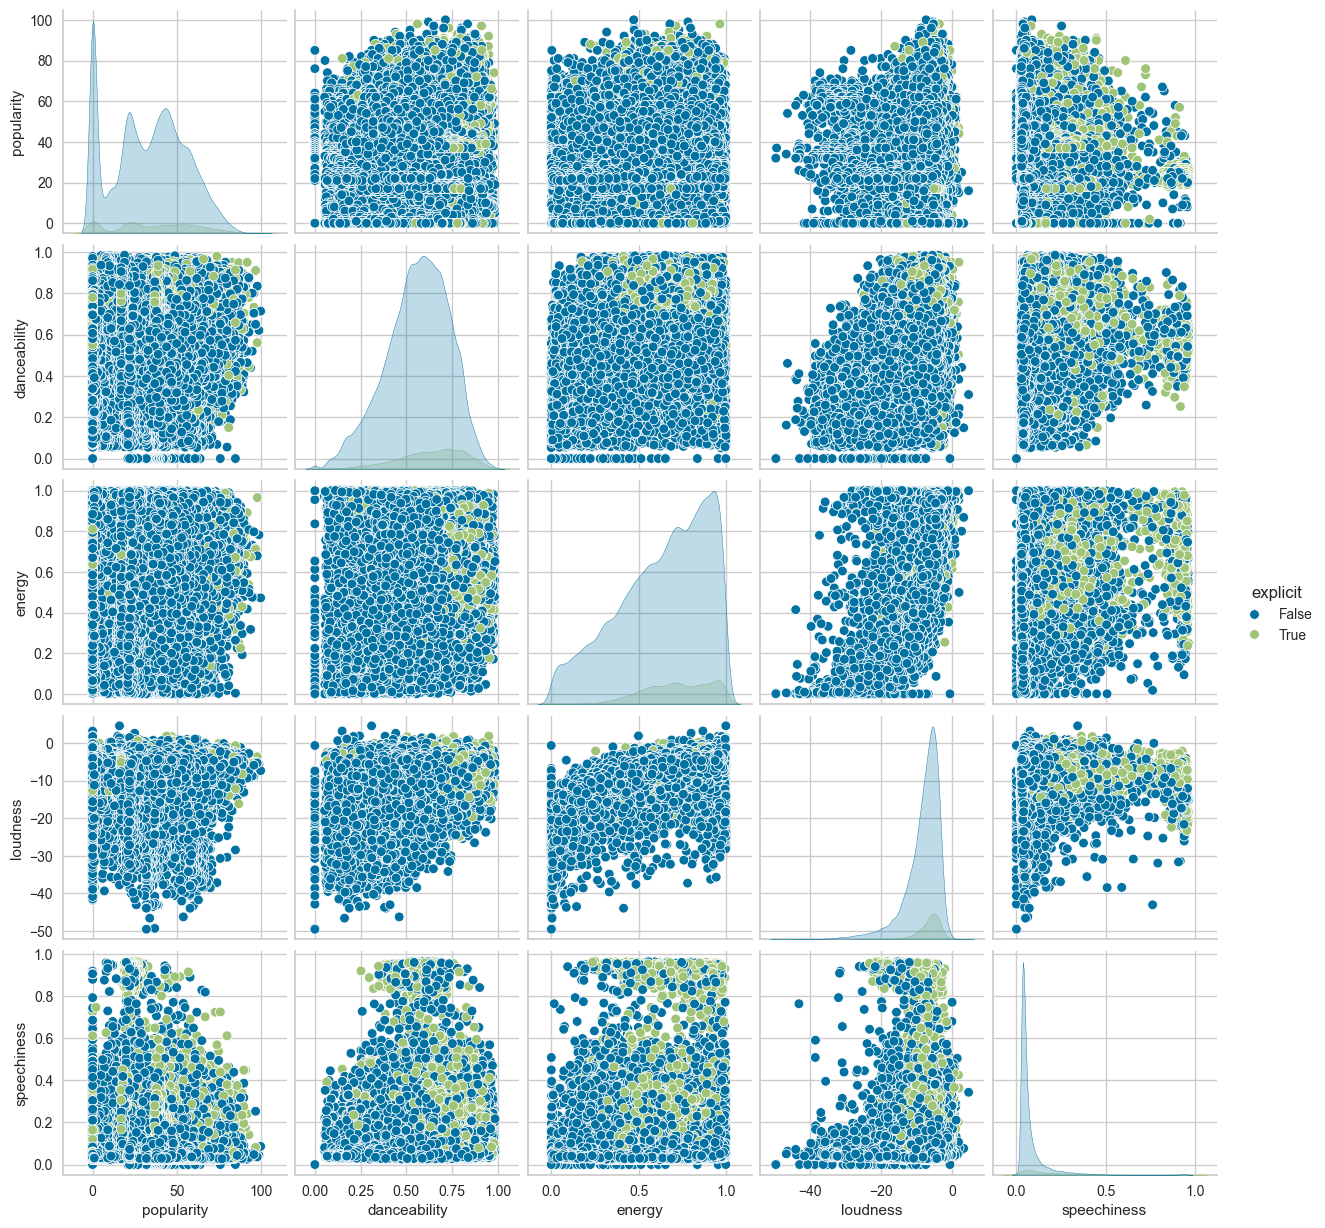

In [324]:
sns.pairplot(df,vars=["popularity","danceability","energy","loudness","speechiness"],hue="explicit",kind="scatter")
plt.show()

In [325]:
# sns.pairplot(df,vars=["acousticness","instrumentalness","liveness","valence","tempo"],hue="explicit",kind="scatter")
# plt.show()

In [326]:
# sns.pairplot(df,vars=["popularity","danceability","energy","loudness","speechiness"],hue="mode",kind="scatter")
# plt.show()

In [327]:
# sns.pairplot(df,vars=["acousticness","instrumentalness","liveness","valence","tempo"],hue="mode",kind="scatter")
# plt.show()

In [328]:
# sns.pairplot(df,vars=["popularity","danceability","energy","loudness","speechiness"],hue="time_signature",kind="scatter")
# plt.show()

In [329]:
# sns.pairplot(df,vars=["acousticness","instrumentalness","liveness","valence","tempo"],hue="time_signature",kind="scatter")
# plt.show()

#### Conclusion of EDA->

### Feature Engineering

In [4]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [6]:
df.drop(["track_id","artists","album_name","track_name","Unnamed: 0"],axis=1,inplace=True)

In [11]:
df["explicit"]=df["explicit"].astype("int")

In [7]:
df.head()

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666     False         0.676  0.4610    1    -6.746   
1          55       149610     False         0.420  0.1660    1   -17.235   
2          57       210826     False         0.438  0.3590    0    -9.734   
3          71       201933     False         0.266  0.0596    0   -18.515   
4          82       198853     False         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature track_genre  
0   87.917               4    acoustic  
1   77.489               4    acoustic  
2   76.332               4    acoustic  
3  181.740               3    acoustic  
4  119.949               4    acoustic

In [12]:
df["track_genre"]

0            acoustic
1            acoustic
2            acoustic
3            acoustic
4            acoustic
             ...     
113995    world-music
113996    world-music
113997    world-music
113998    world-music
113999    world-music
Name: track_genre, Length: 114000, dtype: object

In [13]:
! pip install gensim


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import gensim

In [15]:
import gensim.downloader as api

In [16]:
glove_model=api.load("glove-wiki-gigaword-300")

In [17]:
glove_model.most_similar("acoustic",topn=5)

[('guitar', 0.6608458757400513),
 ('guitars', 0.6346383690834045),
 ('instrumentation', 0.6038997173309326),
 ('vocals', 0.5810157656669617),
 ('percussion', 0.5294560194015503)]

In [18]:
unique_genre=df["track_genre"].unique()
unique_genre

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [19]:
df["track_genre"]=df["track_genre"].replace("black-metal","metal")
df["track_genre"]=df["track_genre"].replace('chicago-house',"house")
df["track_genre"]=df["track_genre"].replace('death-metal',"metal")
df["track_genre"]=df["track_genre"].replace('deep-house',"house")
df["track_genre"]=df["track_genre"].replace('detroit-techno',"techno")
df["track_genre"]=df["track_genre"].replace('drum-and-bass',"drum")
df["track_genre"]=df["track_genre"].replace('j-dance',"dance")
df["track_genre"]=df["track_genre"].replace('j-idol',"idol")
df["track_genre"]=df["track_genre"].replace('j-rock',"rock") #'minimal-techno'
df["track_genre"]=df["track_genre"].replace('minimal-techno',"techno")
df["track_genre"]=df["track_genre"].replace('pop-film',"pop")
df["track_genre"]=df["track_genre"].replace('progressive-house',"house") #psych-rock
df["track_genre"]=df["track_genre"].replace("psych-rock","rock")
df["track_genre"]=df["track_genre"].replace("r-n-b","rnb")
df["track_genre"]=df["track_genre"].replace("show-tunes","tunes")
df["track_genre"]=df["track_genre"].replace("world-music","music")

In [20]:
new_genre=df["track_genre"].unique()
print(new_genre)
print(len(new_genre))

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime' 'metal'
 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british' 'cantopop' 'house'
 'children' 'chill' 'classical' 'club' 'comedy' 'country' 'dance'
 'dancehall' 'techno' 'disco' 'disney' 'drum' 'dub' 'dubstep' 'edm'
 'electro' 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage'
 'german' 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian' 'idol' 'j-pop'
 'rock' 'jazz' 'k-pop' 'kids' 'latin' 'latino' 'malay' 'mandopop'
 'metalcore' 'mpb' 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop'
 'power-pop' 'punk-rock' 'punk' 'rnb' 'reggae' 'reggaeton' 'rock-n-roll'
 'rockabilly' 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul' 'spanish' 'study'
 'swedish' 'synth-pop' 'tango' 'trance' 'trip-hop' 'turkish' 'music']
103


In [21]:
vector=[glove_model[word] for word in new_genre]

In [23]:
vector_df=pd.DataFrame(dict(zip(new_genre,vector)))
vector_df=vector_df.T
vector_df

0         1         2        3        4         5    \
acoustic     0.053505  0.412540 -0.293170  0.27488 -0.11456 -0.518500   
afrobeat     0.163380 -0.613720 -0.407050  0.80922 -0.35084 -0.366920   
alt-rock     0.153710  0.104600 -0.086672  0.58783 -0.24564 -0.073779   
alternative -0.196580 -0.198840  0.282830  0.26342  0.42873 -0.181430   
ambient      0.088063  0.360240  0.000777  0.16834 -0.61432 -0.656180   
...               ...       ...       ...      ...      ...       ...   
tango        0.609200 -0.055350  0.061953 -0.28094 -0.49819 -0.446680   
trance      -0.031449 -0.017937 -0.432580  0.24843  0.47044 -0.845870   
trip-hop    -0.250340  0.169760  0.044528  0.52033 -0.43394 -0.837850   
turkish      0.497770  0.285840  0.690370  0.38298  0.23411 -0.788540   
music       -0.380810 -0.247640 -0.249490  0.10468 -0.56411 -0.806540   

                  6         7         8        9         10       11   \
acoustic     0.191490  0.029506  0.013395 -0.53094  0.622900  0.25728   
afrobeat    -0.272560  0.188450 -0.167530  1.20190 -0.400520  0.18887   
alt-rock     0.343850  0.117590  0.028315  0.88102 -0.254450  0.75309   
alternative  0.295950 -0.049581 -0.057154 -1.48370 -0.058949  0.18862   
ambient      0.117740  0.166360 -0.027345 -0.52004 -0.383490 -0.13673   
...               ...       ...       ...      ...       ...      ...   
tango       -0.695860 -0.341450 -0.178750  0.46356 -0.231690  0.14056   
trance      -0.073395  0.068562 -0.543630  0.20829  0.142740 -0.44908   
trip-hop     0.464990  0.335270 -0.086538  1.28840 -0.172910 -0.10819   
turkish     -0.147900 -0.063574  0.116020 -1.62700 -0.265910 -0.17554   
music       -0.057066 -0.095754  0.006889 -0.71620  0.087038  0.27311   

                  12        13        14        15        16        17   \
acoustic     0.194540 -0.167980  0.576380  0.052524  0.023325 -0.060629   
afrobeat     0.962820 -0.174070 -0.123340 -0.219650  0.222840  0.489340   
alt-rock     0.109080 -0.087331  0.187810 -0.590840  0.192640 -0.096148   
alternative -0.121480  0.495280  0.259480 -0.478780 -0.481030  0.279840   
ambient      0.097744 -0.138130  0.412190 -0.258700 -0.649150 -0.205380   
...               ...       ...       ...       ...       ...       ...   
tango       -0.459450  0.499030  0.067769 -0.628890 -0.192810  0.211790   
trance      -0.527760 -0.435920  0.524210  0.381720 -0.710800 -0.207770   
trip-hop     0.262720  0.183470  0.542480 -0.148960 -0.423630  0.281310   
turkish     -0.020873  0.517800  0.732130  0.614860  0.041657  0.050237   
music        0.096289  0.661110  0.703880 -0.482440 -0.483750 -0.006015   

                  18        19        20       21        22        23   \
acoustic     0.196470  0.379470  0.288960  0.26676 -0.730780  0.640510   
afrobeat     0.313810 -0.039941 -0.514180 -0.15984 -0.710350 -0.011586   
alt-rock     0.131210 -0.056322 -0.378750  0.22774  0.074854  0.146730   
alternative  0.265830 -0.217360 -0.251520  0.17590 -0.260990  0.885910   
ambient     -0.073466  0.653070  0.112070  0.34914 -0.048247  0.653040   
...               ...       ...       ...      ...       ...       ...   
tango        0.177070  0.740730 -0.042321  0.46690 -0.068995  0.411040   
trance      -0.081852  0.385370  0.490950  0.18074  0.057964  0.980420   
trip-hop    -0.176160 -0.016601 -0.061984  0.22425 -0.339250  0.326300   
turkish     -0.234250 -1.079400  0.527850 -0.21426 -0.061460  0.426910   
music        0.806350  0.376880  0.444190  0.65196 -0.322770  0.750820   

                  24        25        26        27        28        29   \
acoustic    -0.410110  0.044799  0.093116 -0.088870 -0.130040  0.342090   
afrobeat    -0.028741 -0.112040 -0.022031 -0.216280 -0.303950  0.650990   
alt-rock     0.125410 -0.166640 -0.018591  0.656900 -0.471090 -0.215760   
alternative -0.270440 -0.209930  0.114070 -0.029844 -0.173580  0.628840   
ambient     -0.389180 -0.101720  0.382110  0.356640 -0.861260  0.468080   
...               ...   

In [24]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
vector_df_norm=scalar.fit_transform(vector_df)

In [25]:
vector_df_norm=pd.DataFrame(vector_df_norm,columns=list(map(str,range(1,301))),index=new_genre)
vector_df_norm

1         2         3         4         5         6  \
acoustic     0.144142  1.501549 -0.512407  0.146713 -0.058370 -0.682972   
afrobeat     0.521934 -1.986744 -0.859087  1.523563 -0.795630 -0.291717   
alt-rock     0.488685  0.454851  0.116227  0.953101 -0.467376  0.464933   
alternative -0.715743 -0.576552  1.241087  0.117184  1.636847  0.187066   
ambient      0.262966  1.323780  0.382446 -0.127812 -1.617761 -1.038349   
...               ...       ...       ...       ...       ...       ...   
tango        2.054829 -0.088825  0.568680 -1.285485 -1.255403 -0.497592   
trance      -0.147961  0.038343 -0.936807  0.078559  1.766994 -1.527973   
trip-hop    -0.900590  0.676332  0.515634  0.779171 -1.054925 -1.507272   
turkish      1.671691  1.070892  2.481745  0.425257  1.029578 -1.379994   
music       -1.349195 -0.742425 -0.379434 -0.291846 -1.461092 -1.426455   

                    7         8         9        10        11        12  \
acoustic     0.615213 -0.145913  0.420004 -0.615622  2.281945  0.667468   
afrobeat    -0.744773  0.315904 -0.121490  1.248533 -0.848458  0.469303   
alt-rock     1.061732  0.110018  0.464658  0.903337 -0.401664  2.103695   
alternative  0.921352 -0.375703  0.208856 -1.640582  0.196328  0.468579   
ambient      0.399074  0.251721  0.298072 -0.603896 -0.796368 -0.473872   
...               ...       ...       ...       ...       ...       ...   
tango       -1.985333 -1.223738 -0.155070  0.454241 -0.332047  0.329362   
trance      -0.161083 -0.032434 -1.247127  0.179627  0.813248 -1.378665   
trip-hop     1.416756  0.742495  0.120913  1.341588 -0.152252 -0.391199   
turkish     -0.379434 -0.416360  0.727152 -1.794741 -0.436718 -0.586294   
music       -0.113228 -0.509860  0.400531 -0.814921  0.642868  0.713323   

                   13        14        15        16        17        18  \
acoustic     0.406687 -1.342521  0.917821  0.729904  0.660039 -0.241203   
afrobeat     2.918185 -1.361304 -1.349140  0.002888  1.266817  1.546005   
alt-rock     0.127319 -1.093778 -0.341073 -0.988614  1.174971 -0.356628   
alternative -0.626379  0.703149 -0.108875 -0.689286 -0.873837  0.865203   
ambient      0.090262 -1.250456  0.385876 -0.101420 -1.385134 -0.711594   
...               ...       ...       ...       ...       ...       ...   
tango       -1.731199  0.714715 -0.729983 -1.090251  0.002716  0.644064   
trance      -1.954503 -2.168919  0.748800  1.609234 -1.572628 -0.719361   
trip-hop     0.629566 -0.258556  0.807991  0.191711 -0.699269  0.869980   
turkish     -0.297496  0.772606  1.422421  2.231985  0.715792  0.119073   
music        0.085505  1.214612  1.330896 -0.699062 -0.882109 -0.063728   

                   19        20        21        22        23        24  \
acoustic    -0.154306  0.519457  0.493258 -0.013407 -1.391338  0.884730   
afrobeat     0.220997 -0.580289 -1.685519 -1.277791 -1.339973 -1.173611   
alt-rock    -0.363035 -0.623242 -1.318121 -0.129057  0.634166 -0.673887   
alternative  0.067537 -1.045503 -0.972968 -0.282704 -0.210204  1.659334   
ambient     -1.017676  1.236869  0.013387  0.230756  0.324669  0.924280   
...               ...       ...       ...       ...       ...       ...   
tango       -0.216355  1.466724 -0.405448  0.579780  0.272505  0.160408   
trance      -1.044497  0.534927  1.041222 -0.268358  0.591702  1.957655   
trip-hop    -1.346135 -0.519089 -0.458791 -0.139401 -0.406963 -0.107074   
turkish     -1.531931 -3.305876  1.141325 -1.439084  0.291449  0.210501   
music        1.796349  0.512665  0.914370  1.128273 -0.365530  1.232923   

                   25        26        27        28        29        30  \
acoustic    -1.006574  0.456809 -0.132275 -0.211803 -0.073573  0.240318   
afrobeat     0.114758  0.006033 -0.554498 -0.562723 -0.641861  1.021702   
alt-rock     0.568005 -0.150895 -0.541884  1.842235 -1.188026 -1.170803   
alternative -0.595905 -0.275316 -0.055441 -0.049231 -0.215849  0.965672   
ambient     -0.945034  0.035694  0.927413

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
new_vector=pca.fit_transform(vector_df_norm)

In [27]:
pca.explained_variance_ratio_

array([7.40227848e-02, 6.14142753e-02, 4.32660021e-02, 3.63775976e-02,
       3.47768739e-02, 3.12172193e-02, 2.88868900e-02, 2.41108853e-02,
       2.24984605e-02, 2.08143461e-02, 1.99573487e-02, 1.94044206e-02,
       1.82548221e-02, 1.80700682e-02, 1.77486818e-02, 1.64909959e-02,
       1.62599552e-02, 1.58339664e-02, 1.53862545e-02, 1.51531752e-02,
       1.46651296e-02, 1.41427480e-02, 1.34991370e-02, 1.33375507e-02,
       1.24464743e-02, 1.22628650e-02, 1.19925505e-02, 1.13749513e-02,
       1.12785148e-02, 1.09091001e-02, 1.07679348e-02, 1.04787210e-02,
       1.03569534e-02, 9.87627078e-03, 9.76188853e-03, 9.44296177e-03,
       9.31214821e-03, 8.85408185e-03, 8.80196877e-03, 8.56838096e-03,
       8.09962116e-03, 7.94624072e-03, 7.65776401e-03, 7.59160193e-03,
       7.28889322e-03, 7.23749679e-03, 6.96843211e-03, 6.65992917e-03,
       6.31456356e-03, 6.09701080e-03, 6.02554390e-03, 5.90854743e-03,
       5.81215275e-03, 5.54273743e-03, 5.42805437e-03, 5.33358986e-03,
      

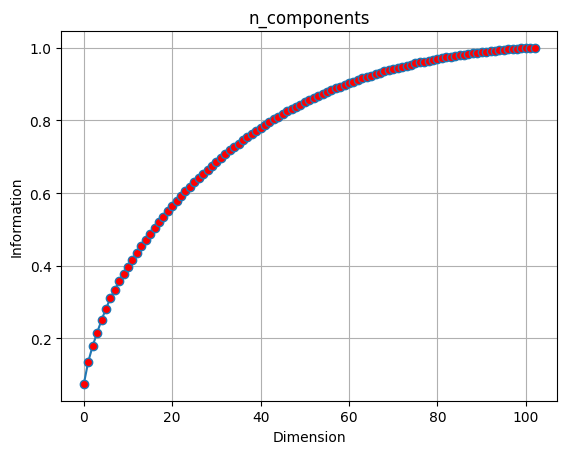

n_components value is 60


In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker="o",markerfacecolor="red")
plt.xlabel("Dimension")
plt.ylabel("Information")
plt.title("n_components")
plt.grid(True)
plt.show()
print("n_components value is 60")

In [34]:
pca1=PCA(n_components=2)
pca_df1=pca1.fit_transform(vector_df_norm)

In [67]:
pca_df=pd.DataFrame(pca_df1,columns=["PCA1","PCA2"],index=new_genre)
pca_df


PCA1      PCA2
acoustic      4.248389 -6.104922
afrobeat      3.790117  2.527386
alt-rock      2.378515  6.926713
alternative  -1.769233 -0.332964
ambient       4.365935 -1.976140
...                ...       ...
tango        -0.843373 -3.230536
trance        2.794359 -1.080747
trip-hop      3.501006  6.596952
turkish     -11.147225  3.756806
music         0.151567 -8.575712

[103 rows x 2 columns]

In [37]:
! pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


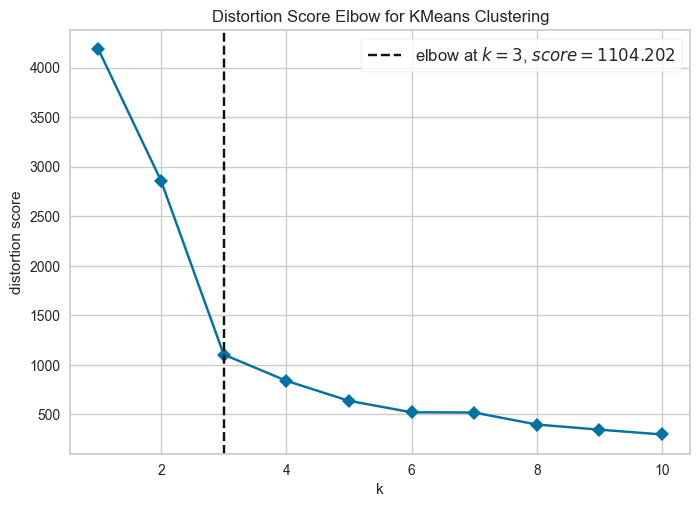

In [69]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
visualizer=KElbowVisualizer(KMeans(),k=(1,11),timings=False,metric="distortion")
visualizer.fit(pca_df)
visualizer.show()
plt.show()

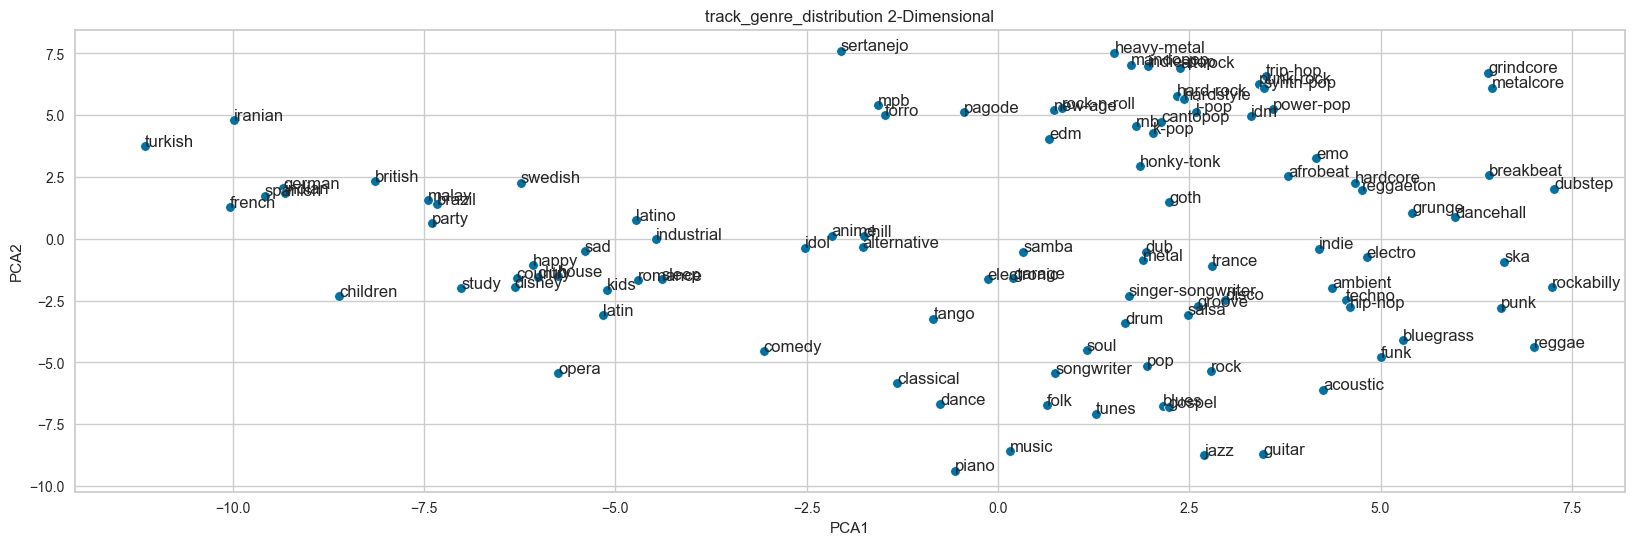

In [41]:
plt.figure(figsize=(20,6))
sns.scatterplot(x="PCA1",y="PCA2",data=pca_df)
for index,feature in enumerate(new_genre):
    plt.annotate(feature,xy=(new_vector[index,0],new_vector[index,1]))
plt.grid(True)
plt.title("track_genre_distribution 2-Dimensional")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [42]:
from sklearn.cluster import KMeans

# Choose number of clusters (example: 5)
mean = KMeans(n_clusters=3, random_state=42)

# Fit the model on your PCA data
mean.fit(pca_df)


KMeans(n_clusters=3, random_state=42)

In [43]:
mean.cluster_centers_

array([[ 2.4531388 , -4.027061  ],
       [ 2.7736583 ,  4.687566  ],
       [-6.3325596 , -0.07739616]], dtype=float32)

In [44]:
mean.labels_

array([0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0], dtype=int32)

In [45]:
from sklearn.metrics import silhouette_score
print(silhouette_score(pca_df,mean.labels_,metric="manhattan"))

0.5024383876563568


In [46]:
from sklearn.metrics import silhouette_score
print(silhouette_score(pca_df,mean.labels_,metric="euclidean"))

0.5155482888221741


In [47]:
pca_df["cluster"]=mean.fit_predict(pca_df)

In [48]:
pca_df.head()

PCA1      PCA2  cluster
acoustic     4.248389 -6.104922        0
afrobeat     3.790117  2.527386        1
alt-rock     2.378515  6.926713        1
alternative -1.769233 -0.332964        2
ambient      4.365935 -1.976140        0

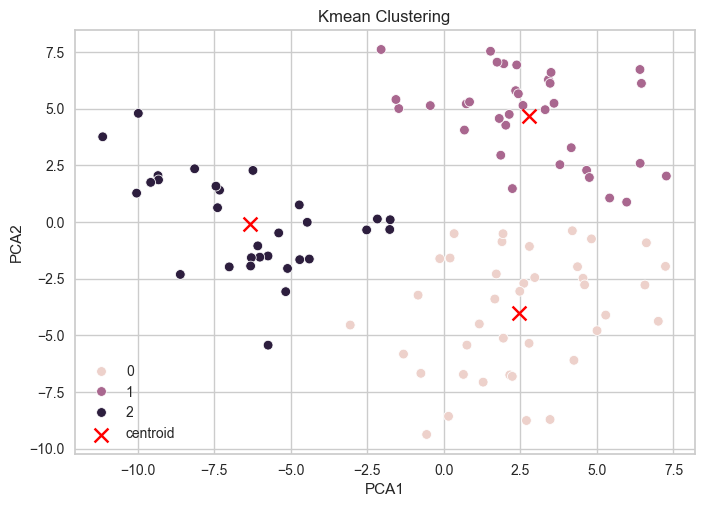

In [49]:
sns.scatterplot(x=pca_df["PCA1"],y=pca_df["PCA2"],hue=pca_df["cluster"])
plt.scatter(mean.cluster_centers_[:,0],mean.cluster_centers_[:,1],marker="x",color="red",s=100,label="centroid")
plt.legend()
plt.title("Kmean Clustering")
plt.show()

In [50]:
for i in range(3):
    genre_=pca_df[pca_df["cluster"]==i].index.tolist()
    print(i)
    print(genre_)
    print("--")

0
['acoustic', 'ambient', 'metal', 'bluegrass', 'blues', 'classical', 'comedy', 'dance', 'techno', 'disco', 'drum', 'dub', 'electro', 'electronic', 'folk', 'funk', 'garage', 'gospel', 'groove', 'guitar', 'hip-hop', 'indie', 'rock', 'jazz', 'piano', 'pop', 'punk', 'reggae', 'rockabilly', 'salsa', 'samba', 'tunes', 'singer-songwriter', 'ska', 'songwriter', 'soul', 'tango', 'trance', 'music']
--
1
['afrobeat', 'alt-rock', 'breakbeat', 'cantopop', 'dancehall', 'dubstep', 'edm', 'emo', 'forro', 'goth', 'grindcore', 'grunge', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'honky-tonk', 'idm', 'indie-pop', 'j-pop', 'k-pop', 'mandopop', 'metalcore', 'mpb', 'new-age', 'pagode', 'power-pop', 'punk-rock', 'rnb', 'reggaeton', 'rock-n-roll', 'sertanejo', 'synth-pop', 'trip-hop']
--
2
['alternative', 'anime', 'brazil', 'british', 'house', 'children', 'chill', 'club', 'country', 'disney', 'french', 'german', 'happy', 'indian', 'industrial', 'iranian', 'idol', 'kids', 'latin', 'latino', 'malay',

In [51]:
# Define cluster-to-genre mapping
genre_to_cluster = {
    # Cluster 0
    'acoustic': 0, 'ambient': 0, 'anime': 0, 'metal': 0, 'bluegrass': 0, 'blues': 0, 'chill': 0, 
    'classical': 0, 'comedy': 0, 'dance': 0, 'techno': 0, 'disco': 0, 'drum': 0, 'dub': 0, 
    'electro': 0, 'electronic': 0, 'folk': 0, 'funk': 0, 'garage': 0, 'gospel': 0, 'groove': 0, 
    'guitar': 0, 'hardcore': 0, 'hip-hop': 0, 'indie': 0, 'idol': 0, 'rock': 0, 'jazz': 0, 
    'piano': 0, 'pop': 0, 'punk': 0, 'reggae': 0, 'rockabilly': 0, 'salsa': 0, 'samba': 0, 
    'tunes': 0, 'singer-songwriter': 0, 'ska': 0, 'songwriter': 0, 'soul': 0, 'tango': 0, 
    'trance': 0, 'music': 0,

    # Cluster 1
    'afrobeat': 1, 'alt-rock': 1, 'breakbeat': 1, 'cantopop': 1, 'dancehall': 1, 'dubstep': 1, 
    'edm': 1, 'emo': 1, 'forro': 1, 'goth': 1, 'grindcore': 1, 'grunge': 1, 'hard-rock': 1, 
    'hardstyle': 1, 'heavy-metal': 1, 'honky-tonk': 1, 'idm': 1, 'indie-pop': 1, 'j-pop': 1, 
    'k-pop': 1, 'mandopop': 1, 'metalcore': 1, 'mpb': 1, 'new-age': 1, 'pagode': 1, 'power-pop': 1, 
    'punk-rock': 1, 'rnb': 1, 'reggaeton': 1, 'rock-n-roll': 1, 'sertanejo': 1, 'synth-pop': 1, 
    'trip-hop': 1,

    # Cluster 2
    'alternative': 2, 'brazil': 2, 'british': 2, 'house': 2, 'children': 2, 'club': 2, 'country': 2, 
    'disney': 2, 'french': 2, 'german': 2, 'happy': 2, 'indian': 2, 'industrial': 2, 'iranian': 2, 
    'kids': 2, 'latin': 2, 'latino': 2, 'malay': 2, 'opera': 2, 'party': 2, 'romance': 2, 'sad': 2, 
    'sleep': 2, 'spanish': 2, 'study': 2, 'swedish': 2, 'turkish': 2
}



In [52]:
df["track_genre"]=df["track_genre"].map(genre_to_cluster)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   popularity        114000 non-null  int64  
 2   duration_ms       114000 non-null  int64  
 3   explicit          114000 non-null  int64  
 4   danceability      114000 non-null  float64
 5   energy            114000 non-null  float64
 6   key               114000 non-null  int64  
 7   loudness          114000 non-null  float64
 8   mode              114000 non-null  int64  
 9   speechiness       114000 non-null  float64
 10  acousticness      114000 non-null  float64
 11  instrumentalness  114000 non-null  float64
 12  liveness          114000 non-null  float64
 13  valence           114000 non-null  float64
 14  tempo             114000 non-null  float64
 15  time_signature    114000 non-null  int64  
 16  track_genre       11

In [54]:
df.head()

Unnamed: 0  popularity  duration_ms  explicit  danceability  energy  key  \
0           0          73       230666         0         0.676  0.4610    1   
1           1          55       149610         0         0.420  0.1660    1   
2           2          57       210826         0         0.438  0.3590    0   
3           3          71       201933         0         0.266  0.0596    0   
4           4          82       198853         0         0.618  0.4430    2   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -6.746     0       0.1430        0.0322          0.000001    0.3580   
1   -17.235     1       0.0763        0.9240          0.000006    0.1010   
2    -9.734     1       0.0557        0.2100          0.000000    0.1170   
3   -18.515     1       0.0363        0.9050          0.000071    0.1320   
4    -9.681     1       0.0526        0.4690          0.000000    0.0829   

   valence    tempo  time_signature  track_genre  
0    0.715   87.917               4            0  
1    0.267   77.489               4            0  
2    0.120   76.332               4            0  
3    0.143  181.740               3            0  
4    0.167  119.949               4            0

In [55]:
popularity=df.groupby("track_genre")["popularity"].mean().reset_index()
popularity

track_genre  popularity
0            0   34.128902
1            1   35.006636
2            2   29.780000

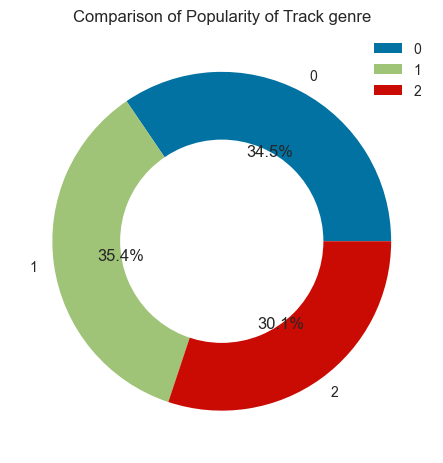

In [56]:
plt.pie(popularity["popularity"],labels=popularity["track_genre"],autopct="%1.1f%%")
plt.pie([1],radius=0.6,colors="white")
plt.legend(loc=1)
plt.title("Comparison of Popularity of Track genre")
plt.show()

In [57]:
from scipy.stats import f_oneway
ho="all Track_genre has equal popularity"
h1="All track -genre has non equal popularity"

track_genre_0=df[df["track_genre"]==0]["popularity"]
track_genre_1=df[df["track_genre"]==1]["popularity"]
track_genre_2=df[df["track_genre"]==1]["popularity"]

f_stats,p_value=f_oneway(track_genre_0,track_genre_1,track_genre_2)

print(f_stats)
print(p_value)

if p_value>0.05:
    print("We failed to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

23.735206718677162
4.943349652144999e-11
We reject the null hypothesis


In [58]:
pd.crosstab(df["explicit"],df["track_genre"])

track_genre      0      1      2
explicit                        
0            46594  30355  27304
1             4406   2645   2696

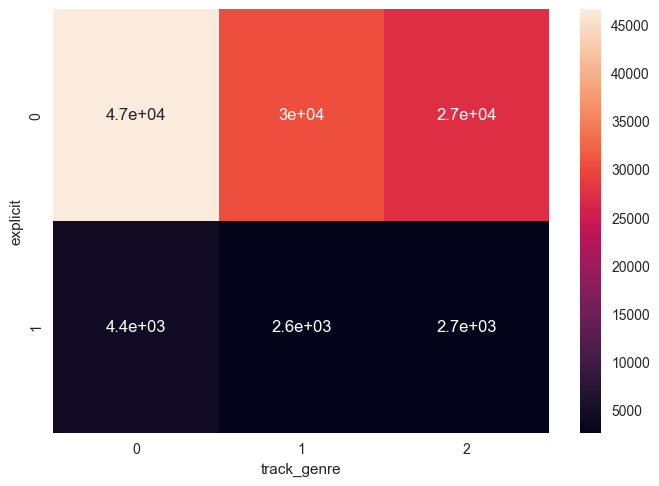

In [59]:
sns.heatmap(pd.crosstab(df["explicit"],df["track_genre"]),annot=True)
plt.show()

In [60]:
df.columns

Index(['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
sns.pairplot(df,vars=['popularity', 'duration_ms','danceability', 'energy', 'loudness',"speechiness"],hue="track_genre",kind="scatter")
plt.show()

In [ ]:
# sns.pairplot(df,vars=['acousticness','instrumentalness', 'liveness', 'valence', 'tempo'],hue="track_genre",kind="scatter")
# plt.show()

In [61]:
x=df.loc[:,['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
y=df.loc[:,["track_genre"]]

In [62]:
x.head()

popularity  duration_ms  explicit  danceability  energy  key  loudness  \
0          73       230666         0         0.676  0.4610    1    -6.746   
1          55       149610         0         0.420  0.1660    1   -17.235   
2          57       210826         0         0.438  0.3590    0    -9.734   
3          71       201933         0         0.266  0.0596    0   -18.515   
4          82       198853         0         0.618  0.4430    2    -9.681   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     0       0.1430        0.0322          0.000001    0.3580    0.715   
1     1       0.0763        0.9240          0.000006    0.1010    0.267   
2     1       0.0557        0.2100          0.000000    0.1170    0.120   
3     1       0.0363        0.9050          0.000071    0.1320    0.143   
4     1       0.0526        0.4690          0.000000    0.0829    0.167   

     tempo  time_signature  
0   87.917               4  
1   77.489               4  
2   76.332               4  
3  181.740               3  
4  119.949               4

In [63]:
y.head()

track_genre
0            0
1            0
2            0
3            0
4            0

In [64]:
df.columns

Index(['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
col=['popularity', 'duration_ms', 'danceability', 'energy','loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(4,3,figsize=(20,6))
for index,feature in enumerate(col):
    row=index//3
    col=index%3
    sns.histplot(df[feature],kde=True,alpha=0.5,ax=ax[row,col],label="Histogram {}".format(feature))
    ax[row,col].set_title("{} Histogram".format(feature))
    ax[row,col].grid()
    ax[row,col].legend()
    
plt.suptitle("Feature histplot")
plt.tight_layout()
plt.show()

In [ ]:
col=['popularity', 'duration_ms', 'danceability', 'energy','loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
fig,ax=plt.subplots(4,3,figsize=(20,6))
for index,feature in enumerate(col):
    row=index//3
    col=index%3
    sns.boxplot(df[feature],showmeans=True,ax=ax[row,col],label="Histogram {}".format(feature))
    ax[row,col].set_title("{} Boxplot".format(feature))
    ax[row,col].grid()
    ax[row,col].legend()
    
plt.suptitle("Feature Boxplot")
plt.tight_layout()  
plt.show()

#### Feature Seletion

In [ ]:
corr=df.corr()
corr

In [ ]:
track_genre_=corr["track_genre"].sort_values(ascending=False).reset_index()
track_genre_

In [ ]:
plt.figure(figsize=(20,6))
corr["track_genre"].plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.title("Target correlation with other features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_scores=mutual_info_classif(x_train,y_train,discrete_features="auto")
mi_df=pd.DataFrame({"Features":x.columns,"mi_score":mi_scores})
mi_df_df=mi_df.sort_values(by="mi_score",ascending=False)
mi_df_df


In [ ]:
plt.figure(figsize=(20,6))
bar=sns.barplot(x="Features",y="mi_score",data=mi_df_df)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Feature Importance")
plt.show()

In [ ]:
x_train.drop(["key","explicit"],axis=1,inplace=True)
x_test.drop(["key","explicit"],axis=1,inplace=True)

In [ ]:
x_train.columns

In [ ]:
for index,feature in enumerate(x_train.columns):
    print(feature,"->",df[feature].skew())

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

more_skewed=["duration_ms","loudness","speechiness","instrumentalness","liveness","time_signature"]
preprocess=ColumnTransformer(transformers=[
    ("trf1",PowerTransformer(),more_skewed)
],remainder="passthrough")

In [ ]:
x_train_transform=preprocess.fit_transform(x_train)
x_test_transform=preprocess.transform(x_test)

In [ ]:
x_train_transform=pd.DataFrame(x_train_transform,columns=x_train.columns)
x_test_transform=pd.DataFrame(x_test_transform,columns=x_test.columns)

In [ ]:
x_train_transform.head()

In [ ]:
col=["duration_ms","loudness","speechiness","instrumentalness","liveness","time_signature"]
fig,ax=plt.subplots(3,2,figsize=(20,6))
for index,feature in enumerate(col):
    row=index//2
    col=index%2
    sns.boxplot(x_train_transform[feature],showmeans=True,ax=ax[row,col],label="Histogram {}".format(feature))
    ax[row,col].set_title("{} Boxplot".format(feature))
    ax[row,col].grid()
    ax[row,col].legend()
    
plt.suptitle("Feature Boxplot")
plt.tight_layout()  
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x_train_transform)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_norm=scalar.fit_transform(x_train_transform)
x_test_norm=scalar.transform(x_test_transform)

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(x_train_norm)
plt.show()

In [ ]:
y_train.value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.pie([1],colors="white",radius=0.6)
plt.show()

In [ ]:
! pip uninstall imbalanced-learn -y
! pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train_norm, y_train)


In [ ]:
y_train_resampled.value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.pie([1],colors="white",radius=0.6)
plt.show()

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(X_train_resampled)
plt.show()

#### Model

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()
logic.fit(X_train_resampled,y_train_resampled)

In [ ]:
train_accuracy=logic.score(X_train_resampled,y_train_resampled)
print(train_accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logic,X_train_resampled,y_train_resampled,cv=5)

print(score)
print(f"Mean: {score.mean()}")
print(f"Std. {score.std()}")

In [ ]:
y_pred_test_logic=logic.predict(x_test_norm)

In [ ]:
y_pred_train_logic=logic.predict(X_train_resampled)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test_logic))
print(accuracy_score(y_train_resampled,y_pred_train_logic))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_logic))

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_test_logic)
ConfusionMatrixDisplay(cm).plot()
plt.show()

#### Decision Tree

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [3,5,10],       
#     'min_samples_split':[13,15,19,21],    
#     'min_samples_leaf': [17,19,21,None],      
#     'max_features': ['sqrt', 'log2', None]     
# }
# grid=GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=5,n_jobs=-1,scoring="accuracy")
# grid.fit(X_train_resampled,y_train_resampled)

# print(grid.best_score_)
# print(grid.best_params_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=17,min_samples_split=13)
dtc.fit(X_train_resampled,y_train_resampled)

In [ ]:
train_accuracy=dtc.score(X_train_resampled,y_train_resampled)
print(train_accuracy)

In [ ]:

from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,X_train_resampled,y_train_resampled,cv=5)

print(score)
print(f"Mean: {score.mean()}")
print(f"Std. {score.std()}")

In [ ]:
y_pred_test_dtc=dtc.predict(x_test_norm)

In [ ]:
y_pred_train_dtc=dtc.predict(X_train_resampled)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_test_dtc))
print(accuracy_score(y_train_resampled,y_pred_train_dtc))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test_dtc))

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_test_dtc)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
importance=dtc.feature_importances_

In [ ]:
feat_importance_df=pd.DataFrame({"feature":x_train_transform.columns,"Importance":importance})
feat_importance_df_df=feat_importance_df.sort_values(by="Importance",ascending=False)
feat_importance_df_df

In [ ]:
plt.figure(figsize=(20,5))
bar=sns.barplot(x=feat_importance_df_df['feature'], y=feat_importance_df_df['Importance'],label="Importance")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.xlabel("Importance")
plt.title("Feature Importance from Decision Tree")
plt.show()

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# param_dist = {
#     'max_depth': [5, 7,10, None],
#     'min_samples_split':[11,13,15,17,21],
#     'min_samples_leaf': [13,15,17,19,21],
#     'max_features': ['sqrt', 'log2']
# }

# # Set up random search
# random_search = RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_distributions=param_dist,
#     n_iter=20,          
#     scoring='f1_weighted',
#     cv=3,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train_resampled,y_train_resampled)

# print(random_search.best_score_)
# print(random_search.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(min_samples_split=15,min_samples_leaf=13,max_features="log2")
forest.fit(X_train_resampled,y_train_resampled)

In [ ]:
train_accuracy=forest.score(X_train_resampled,y_train_resampled)
print(train_accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(forest,X_train_resampled,y_train_resampled,cv=5)

print(score)
print(f"Mean: {score.mean()}")
print(f"Std. {score.std()}")

In [ ]:
y_pred_forest_test=forest.predict(x_test_norm)
y_pred_forest_train=forest.predict(X_train_resampled)

In [ ]:
print(accuracy_score(y_test,y_pred_forest_test))
print(accuracy_score(y_train_resampled,y_pred_forest_train))

In [ ]:
print(classification_report(y_test,y_pred_forest_test))

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred_forest_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
! pip install shap

#### XGboost

In [ ]:

from xgboost import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}
grid_search = RandomizedSearchCV(XGBClassifier(),
    param_distributions=param_grid,
    scoring='accuracy',   
    cv=5,                  
    verbose=2,
    n_jobs=-1,
    n_iter=100            
)

grid_search.fit(X_train_resampled, y_train_resampled)

print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(subsample=0.8,max_depth=7,learning_rate=0.2,colsample_bytree=1)
xgbc.fit(X_train_resampled,y_train_resampled)

In [ ]:
train_accuracy=xgbc.score(X_train_resampled,y_train_resampled)
print(train_accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgbc,X_train_resampled,y_train_resampled,cv=5)

print(score)
print(f"Mean: {score.mean()}")
print(f"Std.:{score.std()}")

In [ ]:
y_pred_test_xg=xgbc.predict(x_test)
y_pred_train_xg=xgbc.predict(X_train_resampled)

In [ ]:
print(accuracy_score(y_test,y_pred_test_xg))
print(accuracy_score(y_train_resampled,y_pred_train_xg))

In [ ]:
print(classification_report(y_test,y_pred_test_xg))

In [ ]:
cm=confusion_matrix(y_test,y_pred_test_xg)
ConfusionMatrixDisplay(cm).plot()
plt.show()

#### ANN

In [ ]:
! pip install tensorflow

In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential #type:ignore
from tensorflow.keras.layers import Dense,Dropout #type:ignore

In [ ]:
classification=Sequential()
classification.add(Dense(units=39,kernel_initializer="he_uniform",input_dim=13,activation="relu"))
classification.add(Dropout(0.2))

classification.add(Dense(units=26,kernel_initializer="he_uniform",activation="relu"))
classification.add(Dropout(0.2))

classification.add(Dense(units=13,kernel_initializer="he_uniform",activation="relu"))
classification.add(Dropout(0.2))

classification.add(Dense(units=3,kernel_initializer="glorot_uniform",activation="softmax"))

classification.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping
er=EarlyStopping(monitor="val_loss",patience=2,restore_best_weights=True)
model=classification.fit(X_train_resampled,y_train_resampled,validation_data=(x_test_norm,y_test),batch_size=1000,epochs=100)

In [ ]:
print(model.history.keys())

In [ ]:
plt.plot(model.history["accuracy"],label="train")
plt.plot(model.history["val_accuracy"],label="test")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs val_accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(model.history["loss"],label="train")
plt.plot(model.history["val_loss"],label="test")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("loss vs val_loss")
plt.legend()
plt.show()


In [ ]:
y_pred_prob_test = classification.predict(x_test_norm)
y_pred_test_ANN = y_pred_prob_test.argmax(axis=1)

In [ ]:
y_pred_prob_train= classification.predict(X_train_resampled)
y_pred_train_ANN = y_pred_prob_train.argmax(axis=1)

In [ ]:
print(accuracy_score(y_test,y_pred_test_ANN))

In [ ]:
print(accuracy_score(y_train_resampled,y_pred_train_ANN))

In [ ]:
print(classification_report(y_test,y_pred_test_ANN))

In [ ]:
cm=confusion_matrix(y_test,y_pred_test_ANN)
ConfusionMatrixDisplay(cm).plot()
plt.show()

#### Comparison 

In [ ]:
from sklearn.metrics import precision_score
precision_score_logic=precision_score(y_test,y_pred_test_logic,average="macro")
precision_score_dtc=precision_score(y_test,y_pred_test_dtc,average="macro")
precision_score_forest=precision_score(y_test,y_pred_forest_test,average="macro")
precision_score_xgboost=precision_score(y_test,y_pred_test_xg,average="macro")
precision_score_ANN=precision_score(y_test,y_pred_test_ANN,average="macro")

comparison=pd.DataFrame({"Logistic Regression":precision_score_logic,
                        "DecisionTreeClassifier":precision_score_forest,
                        "RandomForestClassifier":precision_score_forest,
                        "XGBClassifier":precision_score_xgboost,
                        "ANN":precision_score_ANN},index=["precision_score"])
comparison_df=comparison.T.sort_values(by="precision_score",ascending=False).reset_index()
comparison_df

In [ ]:
plt.figure(figsize=(20,6))
bar=sns.barplot(x="index",y="precision_score",data=comparison_df,label="ML-Model")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,6)}",ha="center",va="bottom")
plt.title("Preciosn values comparison")
plt.legend()
plt.xlabel("ML-Model")
plt.show()


In [ ]:
from sklearn.metrics import f1_score
f1_score_logic=f1_score(y_test,y_pred_test_logic,average="macro")
f1_score_dtc=f1_score(y_test,y_pred_test_dtc,average="macro")
f1_score_forest=f1_score(y_test,y_pred_forest_test,average="macro")
f1_score_xgboost=f1_score(y_test,y_pred_test_xg,average="macro")
f1_score_ANN=f1_score(y_test,y_pred_test_ANN,average="macro")

comparison=pd.DataFrame({"Logistic Regression":precision_score_logic,
                        "DecisionTreeClassifier":precision_score_forest,
                        "RandomForestClassifier":precision_score_forest,
                        "XGBClassifier":precision_score_xgboost,
                        "ANN":precision_score_ANN},index=["f1_score"])
comparison_df=comparison.T.sort_values(by="f1_score",ascending=False).reset_index()
comparison_df

In [ ]:
plt.figure(figsize=(20,6))
bar=sns.barplot(x="index",y="f1_score",data=comparison_df,label="ML-Model")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,6)}",ha="center",va="bottom")
plt.title("Preciosn values comparison")
plt.legend()
plt.xlabel("ML-Model")
plt.show()
print("Decision tree is working well as complared to other one")

In [ ]:
#save the model
import pickle 
with open("decision_tree.pkl","wb") as file:
    pickle.dump(dtc,file)

In [ ]:
import pickle
with open("preprocess.pkl","wb") as file:
    pickle.dump(preprocess,file)

In [ ]:
#save scalar
import pickle
with open("scalar.pkl","wb") as file:
    pickle.dump(scalar,file)